<a href="https://colab.research.google.com/github/Fkita-1978/Cluster-Analysis-in-EHRs/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score


In [4]:
from os import path
path = "/content/Kilimanjaroconverted1.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(20)

Heart diseases  Hypertension  Kidney disease  Neuropathy  Obesity  Stroke  \
0                1             1               0           0        0       1   
1                0             0               0           0        0       0   
2                0             0               0           0        0       0   
3                0             0               0           0        0       0   
4                0             1               0           0        0       0   
5                1             0               0           0        0       1   
6                0             0               0           0        0       0   
7                1             1               0           0        0       1   
8                0             0               0           0        0       0   
9                0             0               0           0        0       0   
10               0             0               0           0        0       0   
11               0             1               0           0        0       0   
12               1             0               0           0        0       1   
13               0             0               0           0        0       0   
14               1             1               0           0        0       1   
15               0             0               0           0        0       0   
16               0             0               0           0        0       0   
17               0             0               0           0        0       0   
18               0             1               0           0        0       0   
19               1             0               0           0        0       1   

    Retinopathy  Dyslipidemia  Osteoporosis  Anxiety  Asthma  Cancer  \
0             0             0             0        0       0       0   
1             0             0             0        0       0       0   
2             0             0             0        0       0       0   
3             0             0             0        0       0       0   
4             1             1             0        0       0       0   
5             0             0             0        0       0       1   
6             0             0             0        0       0       0   
7             0             0             0        0       0       0   
8             0             0             0        0       0       0   
9             0             0             0        0       0       0   
10            0             0             0        0       0       0   
11            1             1             0        0       0       0   
12            0             0             0        0       0       1   
13            0             0             0        0       0       0   
14            0             0             0        0       0       0   
15            0             0             0        0       0       0   
16            0             0             0        0       0       0   
17            0             0             0        0       0       0   
18            1             1             0        0       0       0   
19            0             0             0        0       0       1   

    Cardiac dysrhythmia  COPD  
0                     1     0  
1                     0     0  
2                     0     0  
3                     0     0  
4                     0     0  
5                     0     1  
6                     0     0  
7                     1     0  
8                     0     0  
9                     0     0  
10                    0     0  
11                    0     0  
12                    0     1  
13                    0     0  
14                    1     0  
15                    0     0  
16                    0     0  
17                    0     0  
18                    0     0  
19                    0     1

In [8]:
# Define features (X) for cluster analysis
X = df

In [9]:
# 1. Descriptive Analysis
print("Descriptive Analysis:")
print(df.describe())  # Summary statistics
print("\nClass Distribution:")


Descriptive Analysis:
       Heart diseases  Hypertension  Kidney disease    Neuropathy  \
count    52217.000000  52217.000000    52217.000000  52217.000000   
mean         0.139974      0.288067        0.040025      0.050022   
std          0.346963      0.452867        0.196020      0.217993   
min          0.000000      0.000000        0.000000      0.000000   
25%          0.000000      0.000000        0.000000      0.000000   
50%          0.000000      0.000000        0.000000      0.000000   
75%          0.000000      1.000000        0.000000      0.000000   
max          1.000000      1.000000        1.000000      1.000000   

            Obesity        Stroke   Retinopathy  Dyslipidemia  Osteoporosis  \
count  52217.000000  52217.000000  52217.000000  52217.000000  52217.000000   
mean       0.060038      0.110041      0.030009      0.069977      0.009997   
std        0.237559      0.312944      0.170615      0.255111      0.099484   
min        0.000000      0.000000      0

In [10]:
print(f"Missing statistics: \n\n{df.isna().sum()}")

Missing statistics: 

Heart diseases         0
Hypertension           0
Kidney disease         0
Neuropathy             0
Obesity                0
Stroke                 0
Retinopathy            0
Dyslipidemia           0
Osteoporosis           0
Anxiety                0
Asthma                 0
Cancer                 0
Cardiac dysrhythmia    0
COPD                   0
dtype: int64


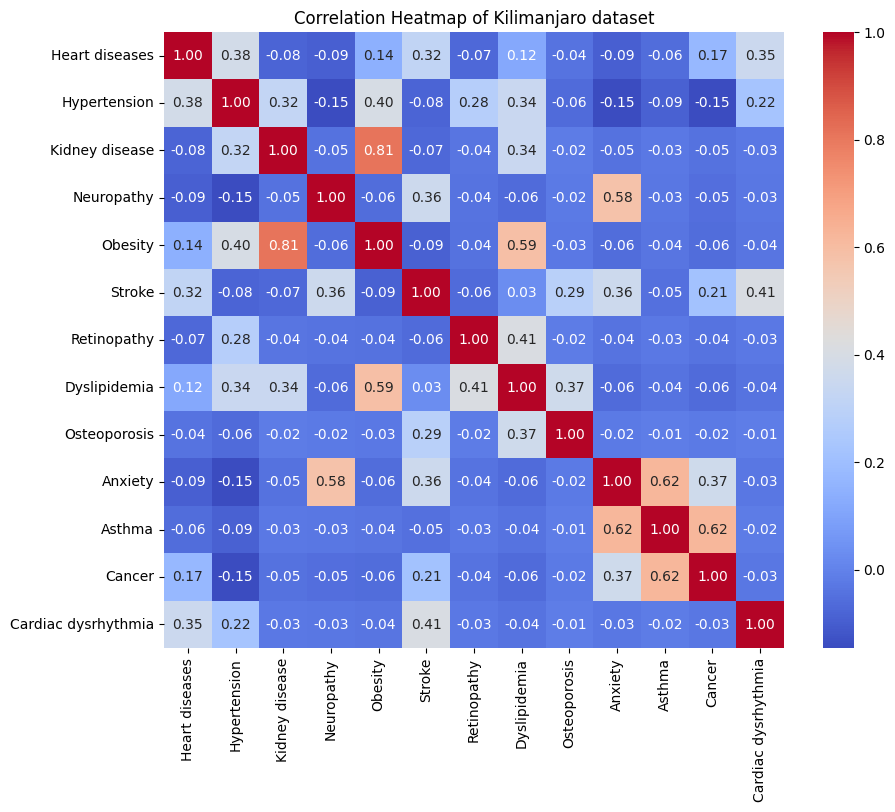

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Kilimanjaro dataset")
plt.show()# Correlation heatmap


In [9]:
# Clustering Methods

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
import pymc as pm

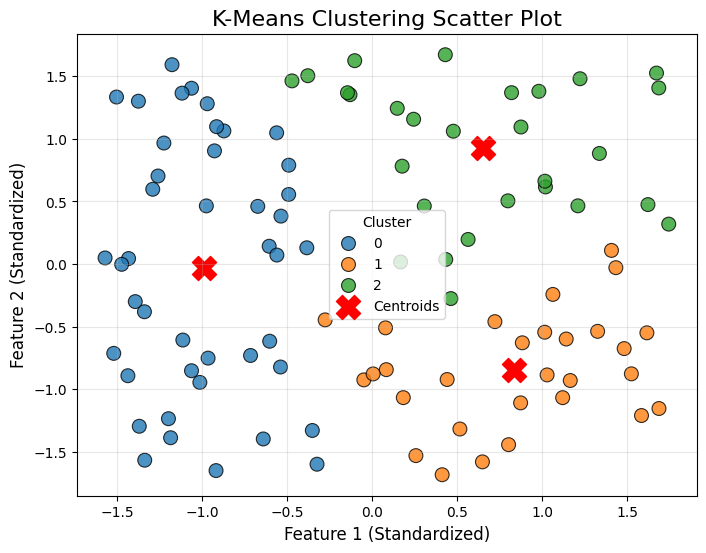

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Fit K-means clustering model
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Plotting the scatter plot (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0],  # First feature
    y=data_scaled[:, 1],  # Second feature
    hue=df['Cluster'],
    palette='tab10',
    s=100,
    alpha=0.8,
    edgecolor="k"
)

# Highlight centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title("K-Means Clustering Scatter Plot", fontsize=16)
plt.xlabel("Feature 1 (Standardized)", fontsize=12)
plt.ylabel("Feature 2 (Standardized)", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


In [16]:
print(df.columns)

Index(['Heart diseases', 'Hypertension', 'Kidney disease', 'Neuropathy',
       'Obesity', 'Stroke', 'Retinopathy', 'Dyslipidemia', 'Osteoporosis',
       'Anxiety', 'Asthma', 'Cancer', 'Cardiac dysrhythmia', 'COPD',
       'Cluster'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

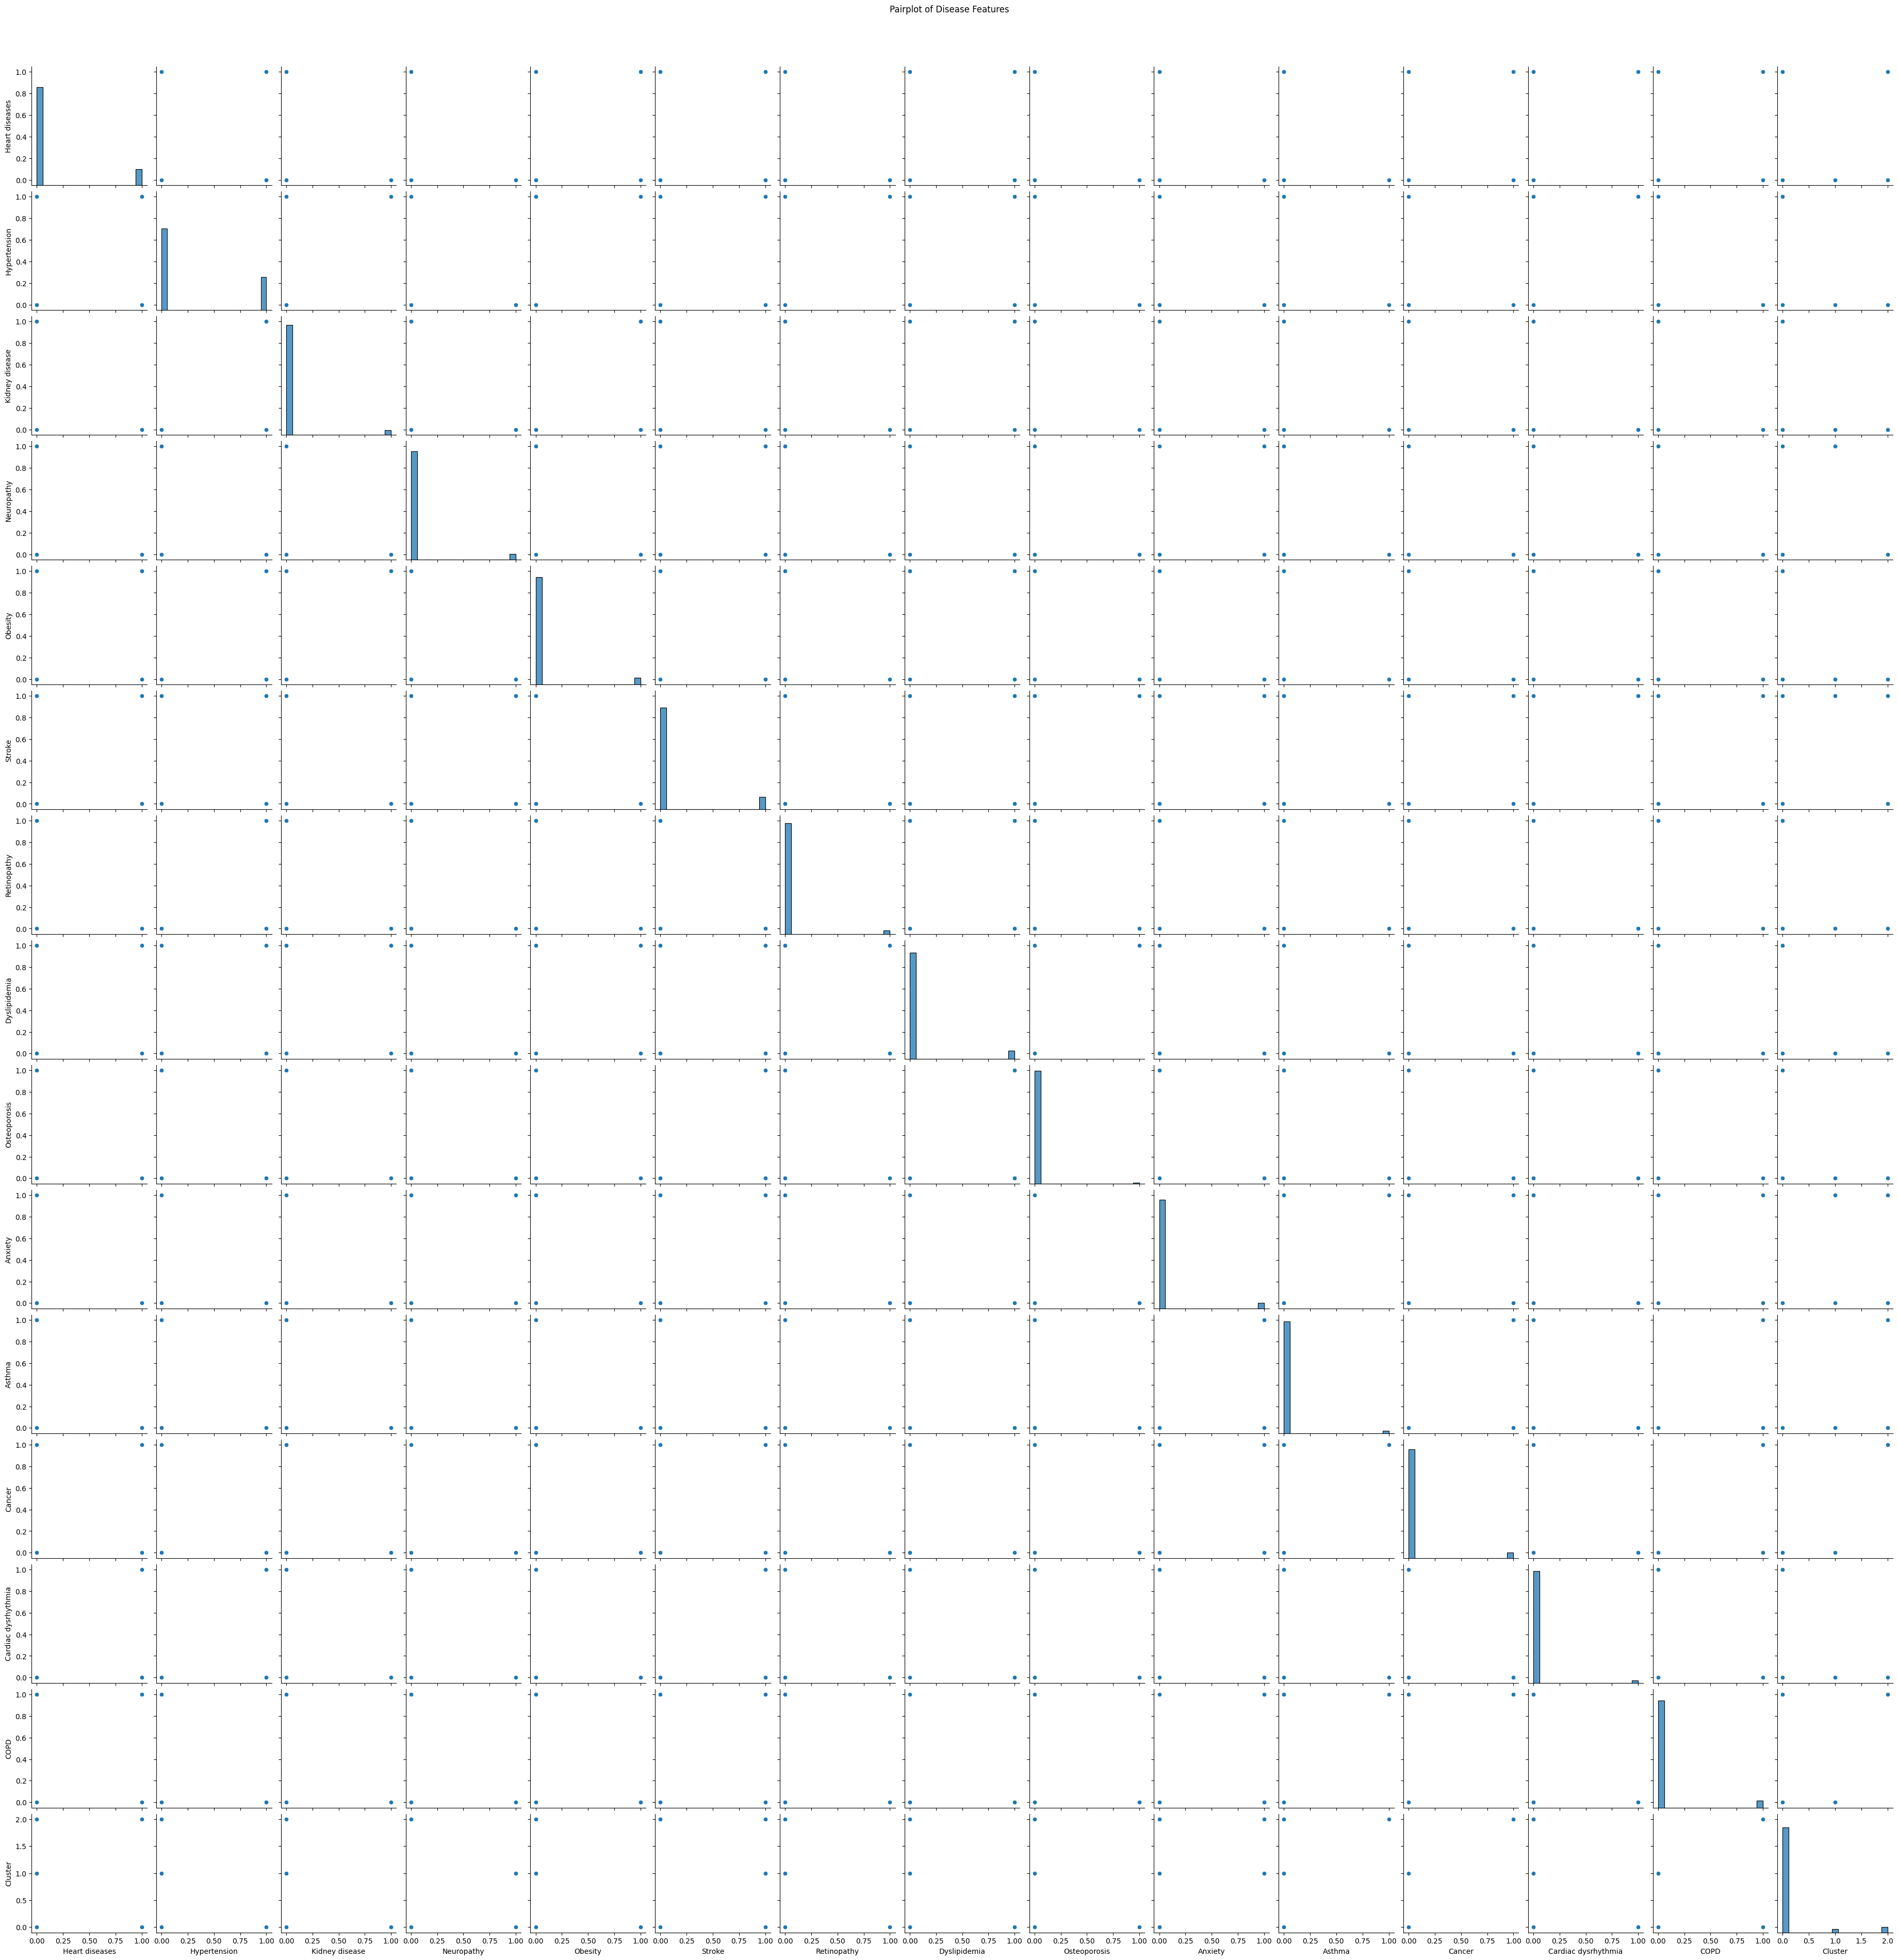

In [17]:
sns.pairplot(
    df,  # Use the DataFrame as-is
    palette="Set2"
)
plt.suptitle("Pairplot of Disease Features", y=1.02)
plt.show()


In [13]:
# validation of clusters from k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
from sklearn.datasets import make_blobs

In [14]:
# K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data_scaled)
kmeans_labels = kmeans_model.labels_


In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from scipy.spatial.distance import cdist
# Perform K-Means clustering
n_clusters = 2  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)

# 1. Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 2. Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(data_scaled, labels)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# 3. Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.91
Calinski-Harabasz Index: 102.66


<ipython-input-16-b6e15aa0a762>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


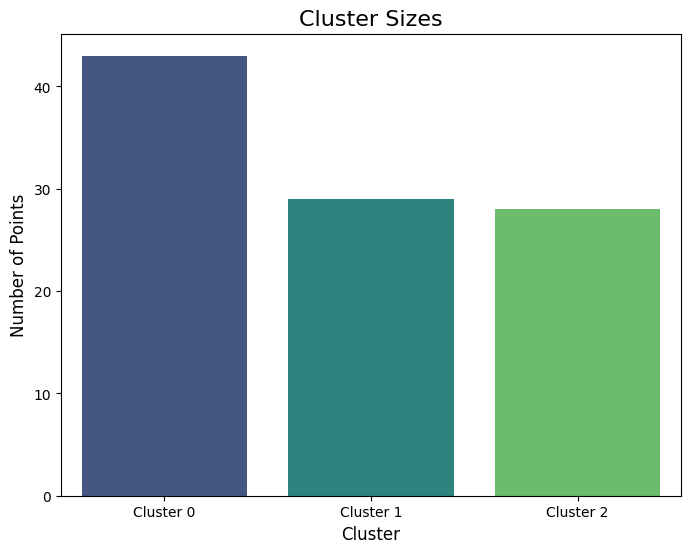

In [16]:
# Count the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Plot cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.xticks(ticks=cluster_counts.index, labels=[f"Cluster {i}" for i in cluster_counts.index])
plt.show()


<ipython-input-17-f949ea46df94>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


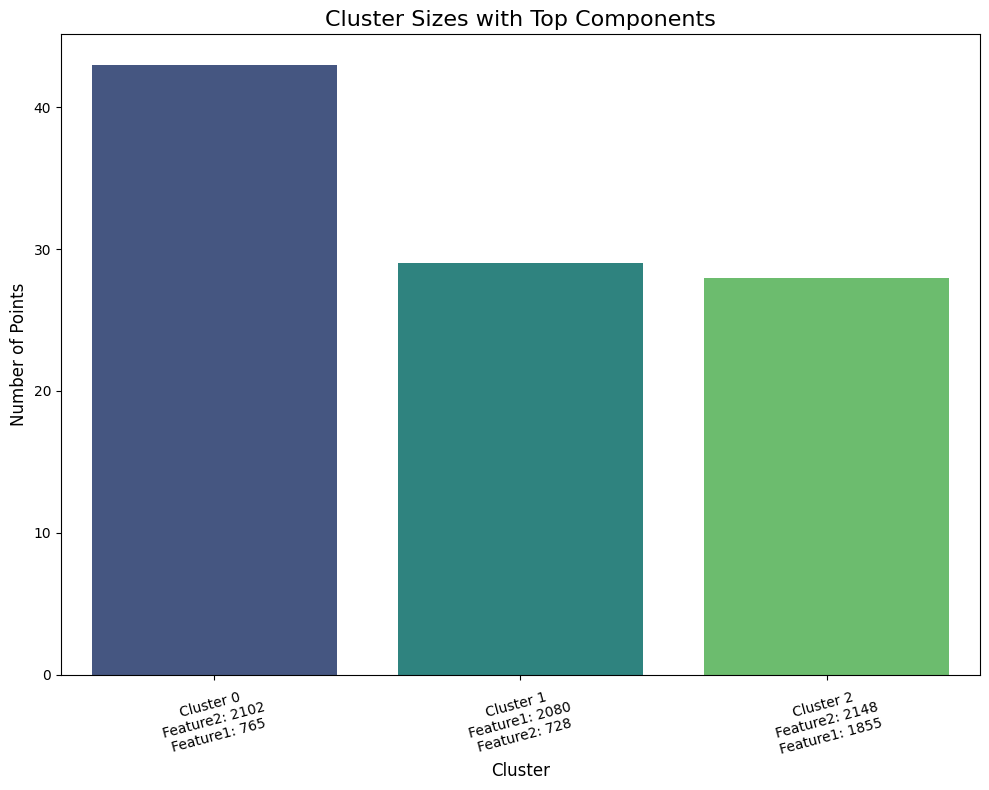

In [17]:
# Count the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Calculate the number of occurrences of each variable/component in each cluster
cluster_components = df.groupby("Cluster").sum()  # Sum values per cluster

# Prepare labels showing components and their counts for each cluster
component_labels = [
    f"Cluster {cluster}\n" +
    "\n".join([f"{var}: {int(count)}" for var, count in cluster_components.loc[cluster].nlargest(3).items()])
    for cluster in cluster_counts.index
]

# Plot cluster sizes with components
plt.figure(figsize=(10, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes with Top Components", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.xticks(
    ticks=cluster_counts.index,
    labels=component_labels,
    fontsize=10,
    rotation=15
)
plt.tight_layout()
plt.show()


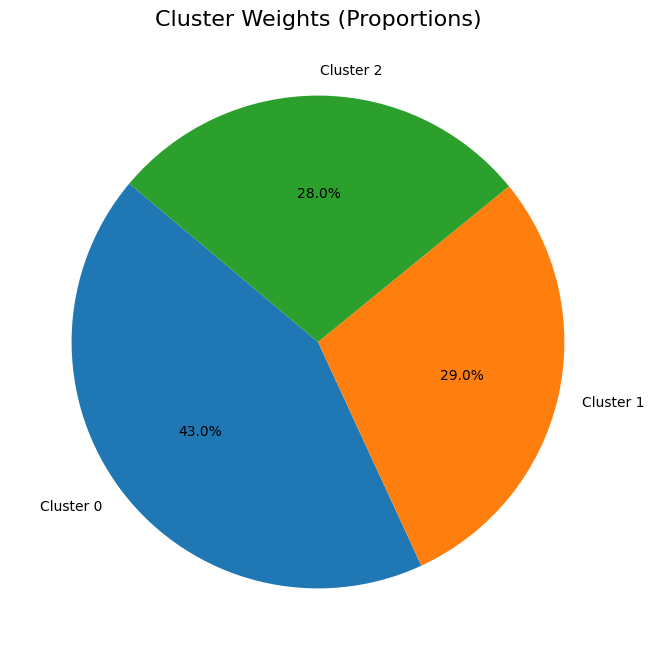

In [18]:
# Plot cluster weights as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
        autopct="%1.1f%%", startangle=140, colors=sns.color_palette("tab10"))
plt.title("Cluster Weights (Proportions)", fontsize=16)
plt.show()


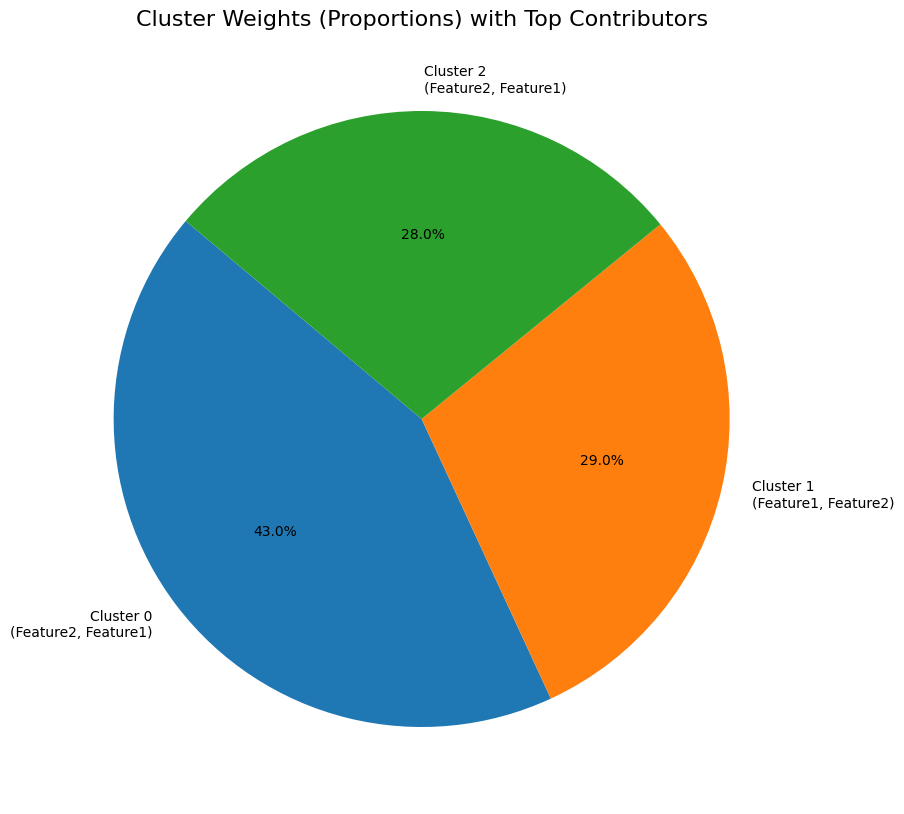

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset: `df` with diseases and a 'Cluster' column
# Replace `df` with your actual dataset
# df = ... (your dataset with a 'Cluster' column and disease variables)

# Calculate cluster counts
cluster_counts = df['Cluster'].value_counts()

# Calculate the mean contribution of each disease per cluster
cluster_means = df.groupby("Cluster").mean()

# Find the top 3 contributing diseases for each cluster
top_contributors = cluster_means.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Prepare labels for the pie chart with top contributors
labels = [
    f"Cluster {i}\n({', '.join(top_contributors[i])})"
    for i in cluster_counts.index
]

# Plot cluster weights as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("tab10")
)
plt.title("Cluster Weights (Proportions) with Top Contributors", fontsize=16)
plt.show()


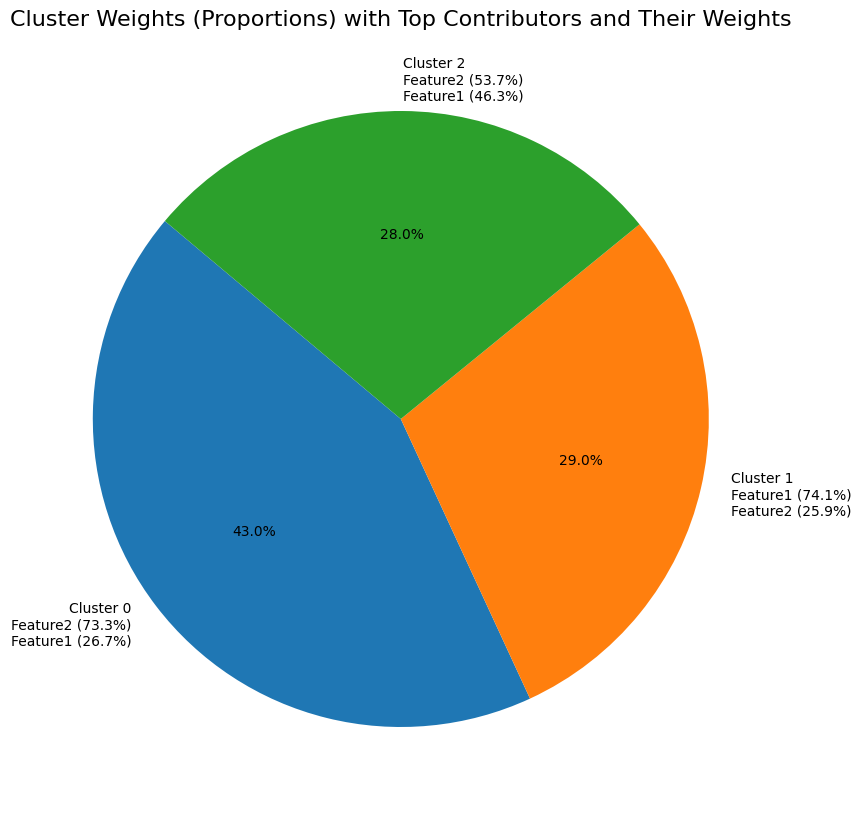

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset: `df` with diseases and a 'Cluster' column
# Replace `df` with your actual dataset
# df = ... (your dataset with a 'Cluster' column and disease variables)

# Calculate cluster counts
cluster_counts = df['Cluster'].value_counts()

# Calculate the mean contribution of each disease per cluster
cluster_means = df.groupby("Cluster").mean()

# Find the top 3 contributing diseases and their weights for each cluster
top_contributors = cluster_means.apply(
    lambda x: [(var, x[var] / x.sum() * 100) for var in x.nlargest(3).index],
    axis=1
)

# Prepare labels for the pie chart with top contributors and their weights
labels = [
    f"Cluster {i}\n" +
    "\n".join([f"{var} ({weight:.1f}%)" for var, weight in top_contributors[i]])
    for i in cluster_counts.index
]

# Plot cluster weights as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("tab10")
)
plt.title("Cluster Weights (Proportions) with Top Contributors and Their Weights", fontsize=16)
plt.show()


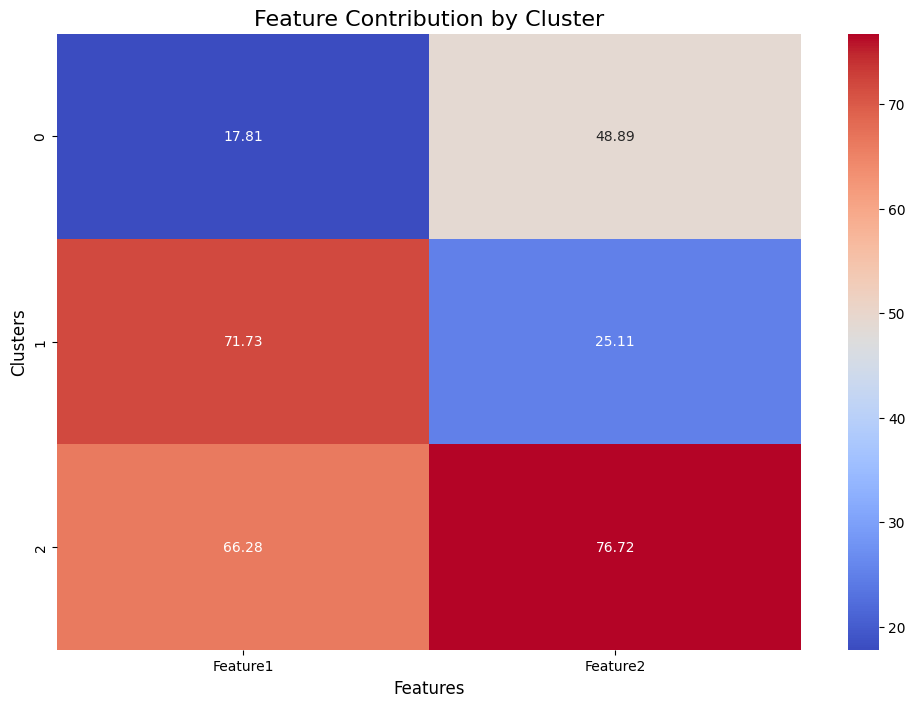

In [21]:
# Calculate mean feature values for each cluster
cluster_features = df.groupby("Cluster").mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()


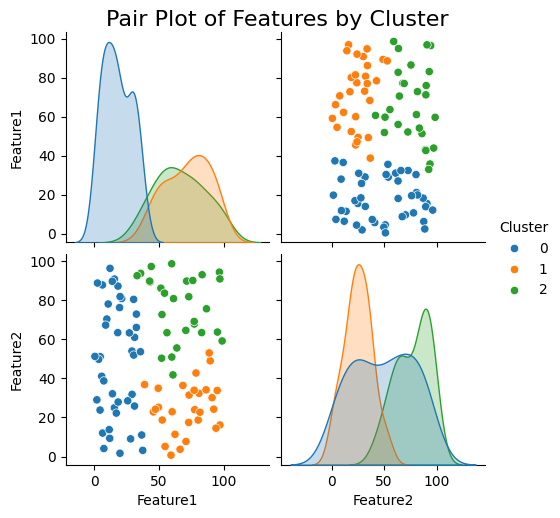

In [22]:
# Check the number of rows in df
n_rows = df.shape[0]

# If there are fewer than 1000 rows, sample all the data
if n_rows < 1000:
    sampled_df = df  # Use all the data
else:
    sampled_df = df.sample(n=1000, random_state=42)

# Pairplot with hue as Cluster
sns.pairplot(sampled_df, hue="Cluster", palette="tab10", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02, fontsize=16)
plt.show()

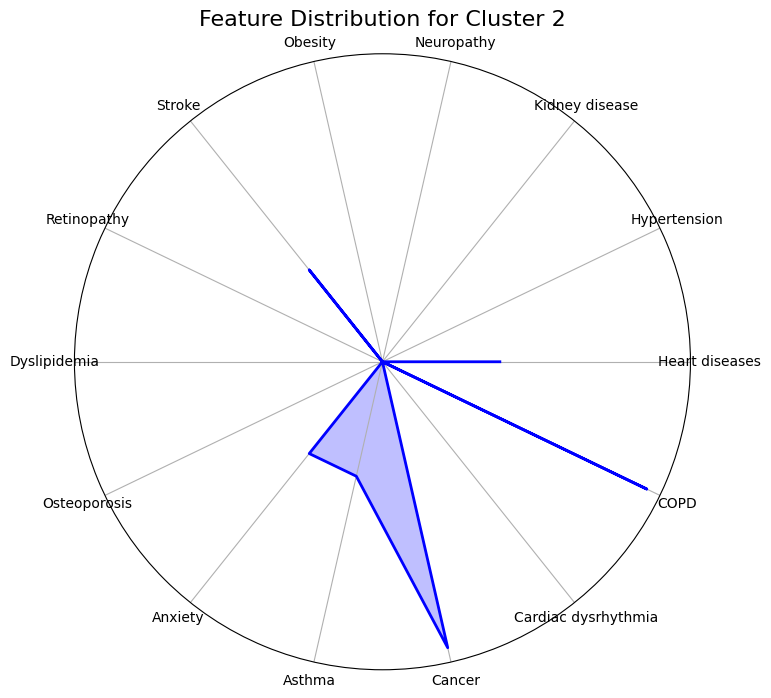

In [30]:
from math import pi

# Select one cluster to visualize (e.g., Cluster 0)
cluster_id = 2
cluster_means = cluster_features.loc[cluster_id]

# Prepare data for the radar chart
categories = cluster_means.index
values = cluster_means.values
values = np.append(values, values[2])  # Append the first value to close the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title(f"Feature Distribution for Cluster {cluster_id}", fontsize=16, pad=20)
plt.show()


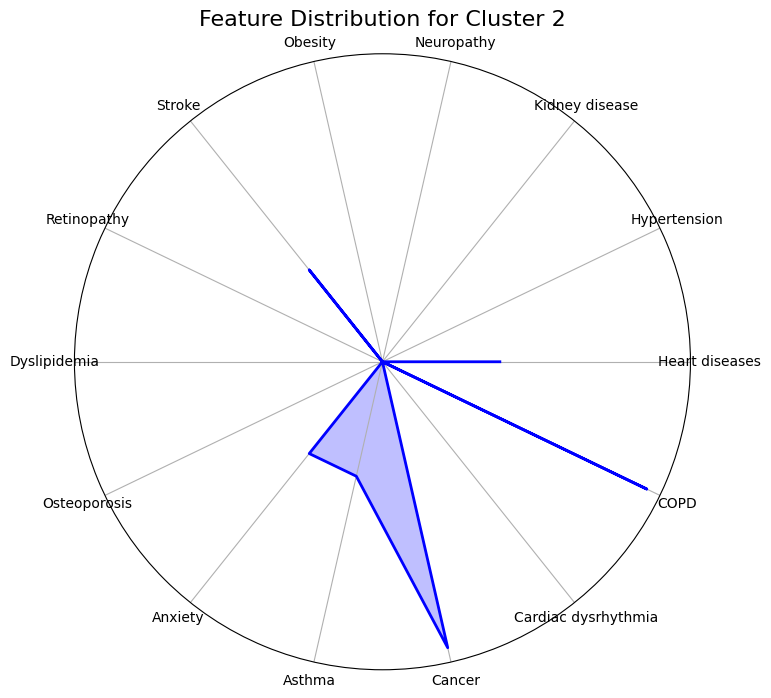

In [31]:
from math import pi

# Select one cluster to visualize (e.g., Cluster 0)
cluster_id = 2
cluster_means = cluster_features.loc[cluster_id]

# Prepare data for the radar chart
categories = cluster_means.index
values = cluster_means.values
values = np.append(values, values[2])  # Append the first value to close the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title(f"Feature Distribution for Cluster {cluster_id}", fontsize=16, pad=20)
plt.show()


In [46]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()



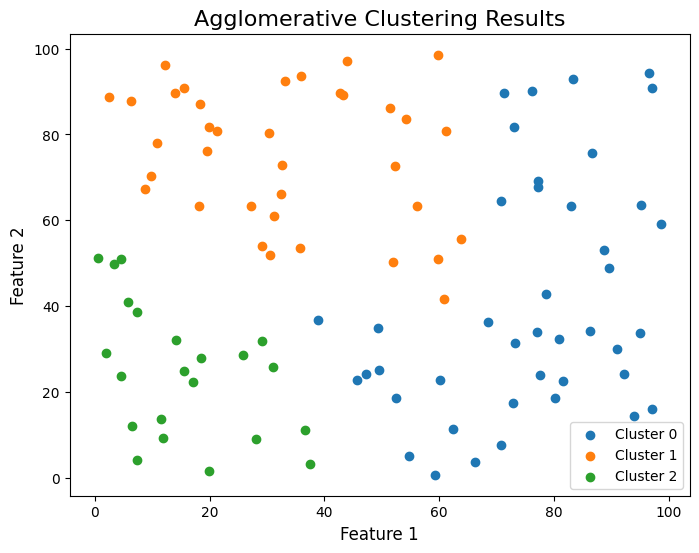

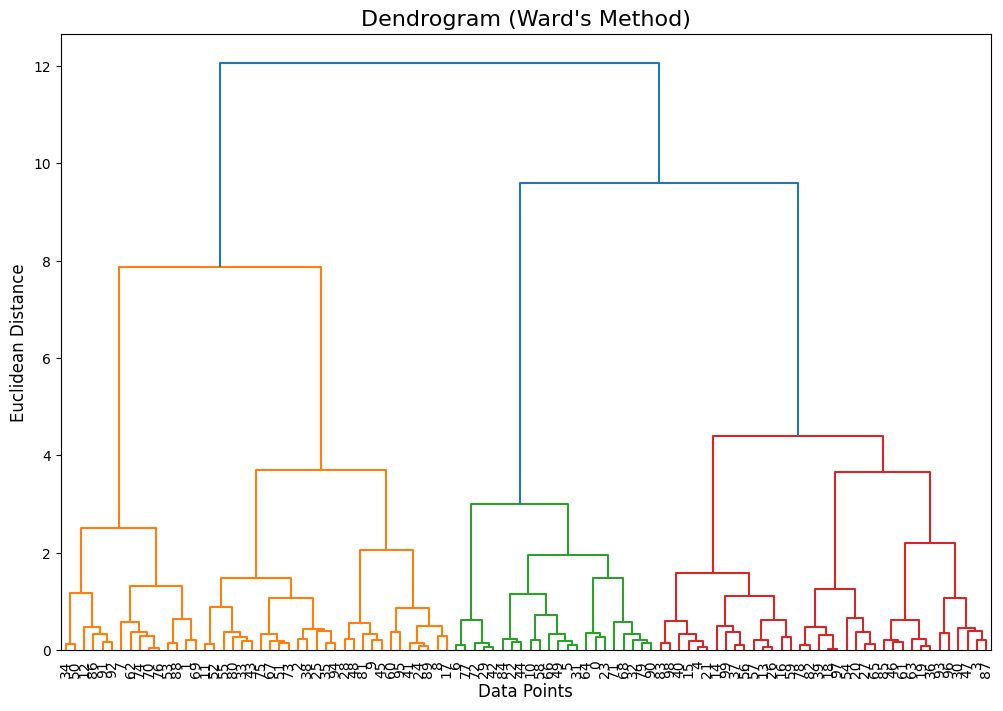

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with your actual dataset)
# Example dataset: Replace `your_data.csv` with your data file
# df = pd.read_csv("your_data.csv")

# Example synthetic data
np.random.seed(42)
df = pd.DataFrame({
    "Feature1": np.random.rand(100) * 100,
    "Feature2": np.random.rand(100) * 100
})

# Preprocess the data: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform hierarchical clustering using AgglomerativeClustering
num_clusters = 3  # Specify the number of clusters
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
clusters = model.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df["Cluster"] = clusters

# Visualize the clusters (for 2D data)
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(
        df[df["Cluster"] == cluster]["Feature1"],
        df[df["Cluster"] == cluster]["Feature2"],
        label=f"Cluster {cluster}"
    )
plt.title("Agglomerative Clustering Results", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.show()

# Dendrogram for hierarchical clustering
linkage_matrix = linkage(scaled_data, method="ward")

plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Change to 'lastp' for a different view
    p=10,  # Show the last 10 merged clusters
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Dendrogram (Ward's Method)", fontsize=16)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Perform Agglomerative Hierarchical Clustering
n_clusters = 2  # Specify the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # 'ward' linkage for variance minimization
labels = agg_clustering.fit_predict(data_scaled)

# 1. Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 2. Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(data_scaled, labels)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# 3. Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Silhouette Score: 0.47
Davies-Bouldin Index: 0.90
Calinski-Harabasz Index: 102.25


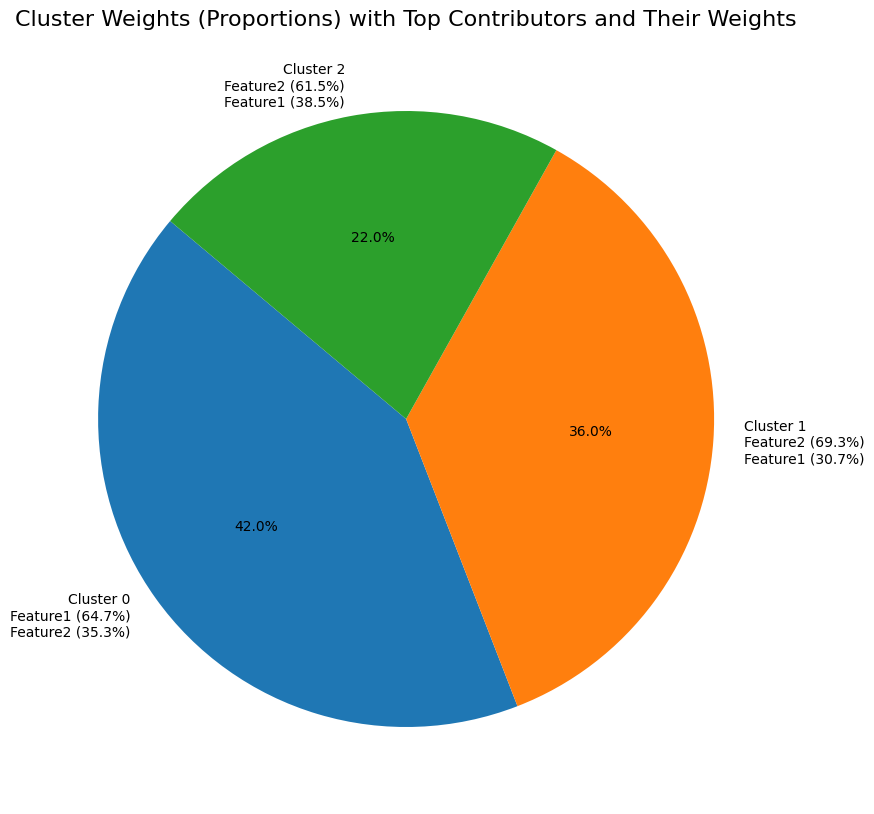

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Example dataset: `df` with diseases and a 'Cluster' column
# Replace `df` with your actual dataset
# df = ... (your dataset with a 'Cluster' column and disease variables)

# Preprocess the data (Standard scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Cluster'], errors='ignore'))  # Drop "Cluster" if it exists

# Perform Agglomerative Clustering
num_clusters = 3  # Specify the number of clusters
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
df['Cluster'] = model.fit_predict(scaled_data)

# Calculate cluster counts
cluster_counts = df['Cluster'].value_counts()

# Calculate the mean contribution of each disease per cluster
cluster_means = df.groupby("Cluster").mean()

# Find the top 3 contributing diseases and their weights for each cluster
top_contributors = cluster_means.apply(
    lambda x: [(var, x[var] / x.sum() * 100) for var in x.nlargest(3).index],
    axis=1
)

# Prepare labels for the pie chart with top contributors and their weights
labels = [
    f"Cluster {i}\n" +
    "\n".join([f"{var} ({weight:.1f}%)" for var, weight in top_contributors[i]])
    for i in cluster_counts.index
]

# Plot cluster weights as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("tab10")
)
plt.title("Cluster Weights (Proportions) with Top Contributors and Their Weights", fontsize=16)
plt.show()


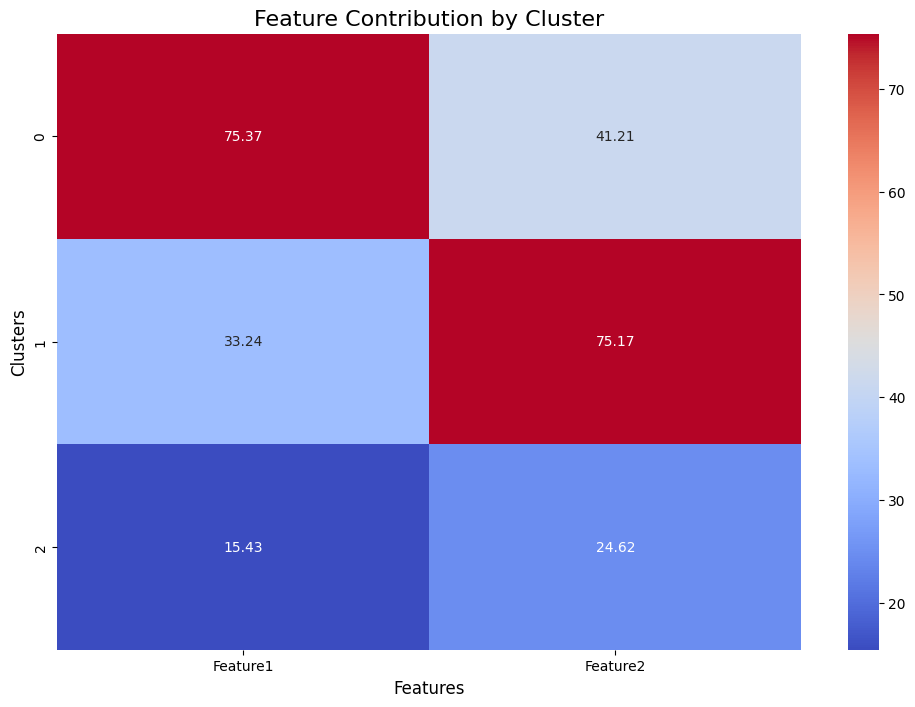

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Example dataset: `df` with disease variables (without the 'Cluster' column)
# Replace `df` with your actual dataset
# df = ... (your dataset with disease variables)

# Preprocess the data (Standard scaling)
scaled_data = df.drop(columns=['Cluster'], errors='ignore')  # Drop "Cluster" column if it exists
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)  # Scale the data

# Perform Agglomerative Clustering
num_clusters = 3  # Specify the number of clusters
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
df['Cluster'] = model.fit_predict(scaled_data)

# Calculate mean feature values for each cluster
cluster_features = df.groupby("Cluster").mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()


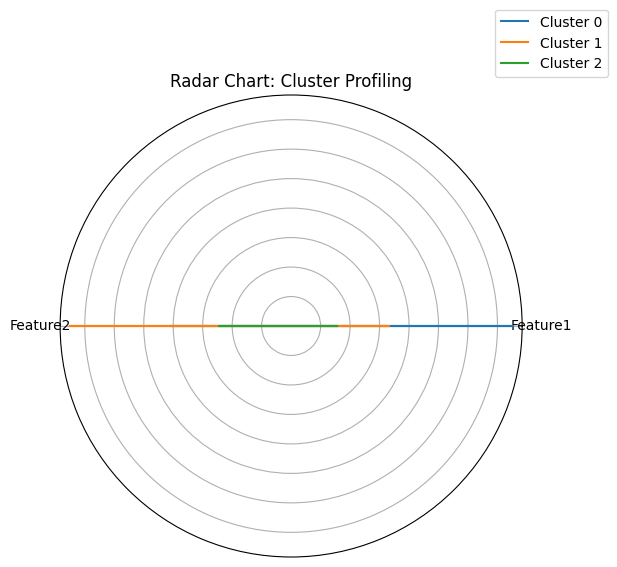

In [27]:
# --- 5. Radar Chart for Cluster Profiling ---
# Radar charts to compare feature means across clusters
def plot_radar_chart(cluster_means, cluster_labels):
    num_vars = len(cluster_means.columns)

    # Set the angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Make the plot circular

    fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

    for i, row in cluster_means.iterrows():
        values = row.tolist()
        values += values[:1]  # Make the plot circular
        ax.plot(angles, values, label=f"Cluster {i}")
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])  # Hide y-axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(cluster_means.columns)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.2))
    plt.title("Radar Chart: Cluster Profiling")
    plt.show()

# Plot radar chart for cluster profiling
plot_radar_chart(cluster_means, cluster_counts.index)

# --- 6. Other Visualizations: 3D Scatter Plot ---
from mpl_toolkits.mplot3d import Axes3D

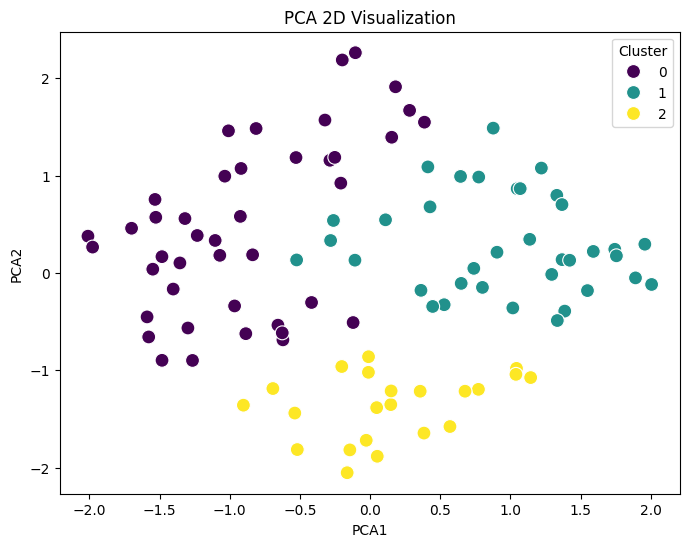

In [28]:
from sklearn.decomposition import PCA

# Check the number of features
num_features = scaled_data.shape[1]

# If the number of features is less than 3, reduce PCA components to match
n_components = min(3, num_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_columns = [f"PCA{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(pca_components, columns=pca_columns)

# Add the cluster labels
df_pca["Cluster"] = df["Cluster"]

# 2D or 3D Visualization based on the number of components
if n_components == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
    plt.title("PCA 2D Visualization")
    plt.show()
else:  # For 3D visualization
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(df_pca["PCA1"], df_pca["PCA2"], df_pca["PCA3"], c=df_pca["Cluster"], cmap="viridis", s=100)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.set_title("PCA 3D Visualization")
    plt.show()


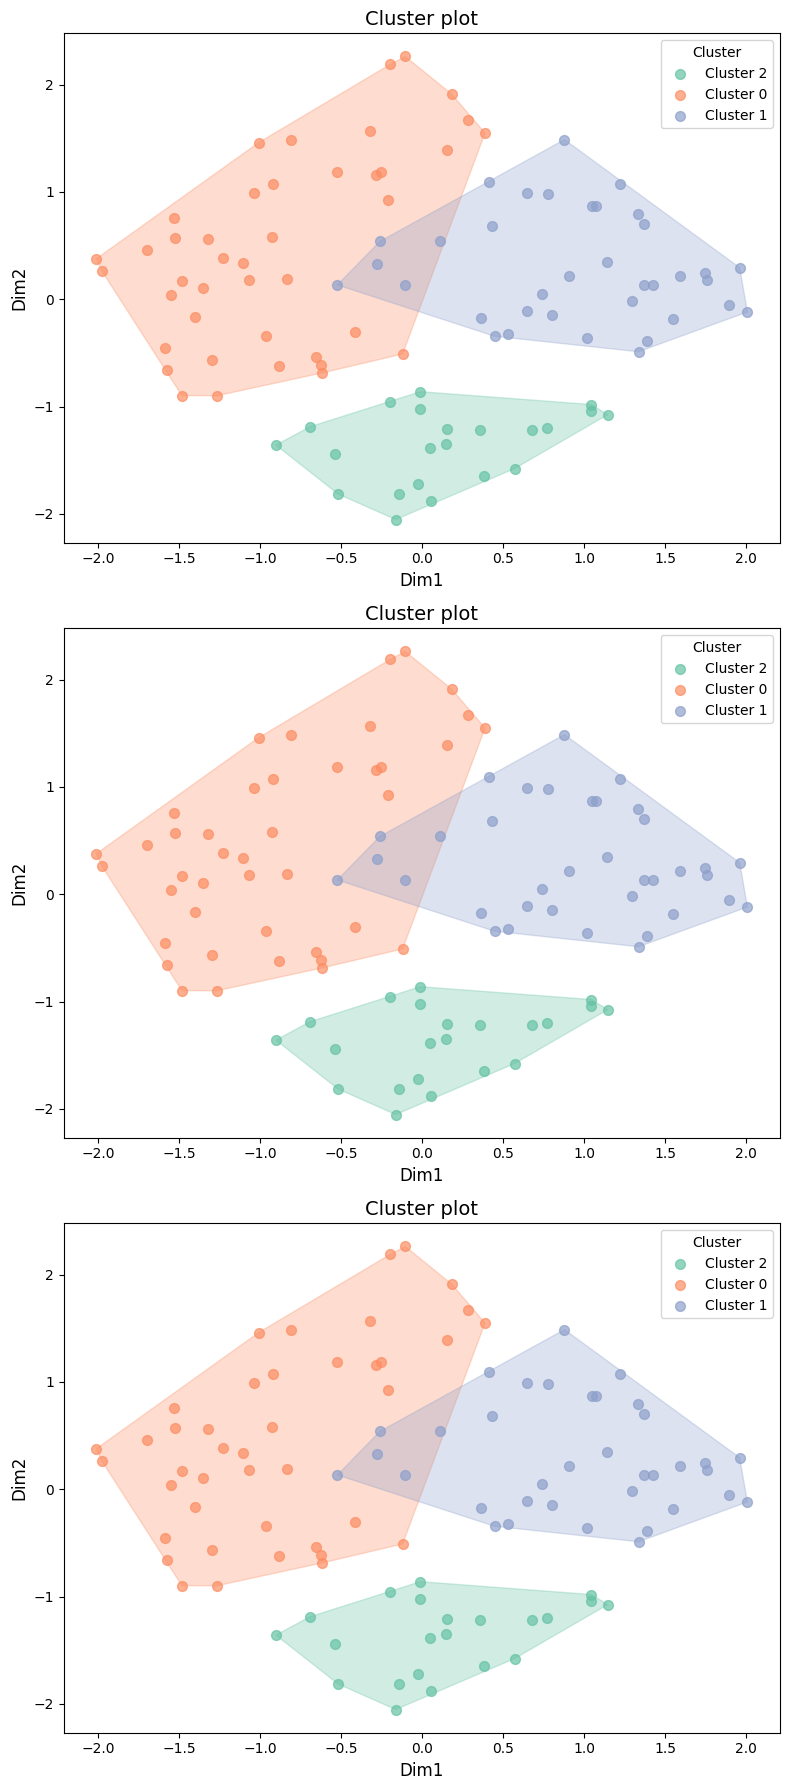

In [29]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Assume scaled_data is the dataset, and df['Cluster'] contains cluster labels

# Dimensionality reduction using PCA to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components and add cluster labels
df_pca = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

# Define a function to plot convex hulls
def plot_clusters_with_hulls(data, cluster_col, ax):
    clusters = data[cluster_col].unique()
    palette = sns.color_palette("Set2", len(clusters))

    for i, cluster in enumerate(clusters):
        cluster_data = data[data[cluster_col] == cluster]
        points = cluster_data[["PCA1", "PCA2"]].values

        # Scatter plot of points
        ax.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster}", color=palette[i], s=50, alpha=0.7)

        # Draw convex hull if the cluster has more than 2 points
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            ax.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.3)

    ax.set_title("Cluster plot", fontsize=14)
    ax.set_xlabel("Dim1", fontsize=12)
    ax.set_ylabel("Dim2", fontsize=12)
    ax.legend(title="Cluster", fontsize=10)

# Plot clusters with convex hulls
fig, axes = plt.subplots(3, 1, figsize=(8, 18))  # Create 3 subplots vertically

# For each cluster plot, you can filter subsets of data if needed
for idx, ax in enumerate(axes):
    plot_clusters_with_hulls(df_pca, "Cluster", ax)

plt.tight_layout()
plt.show()


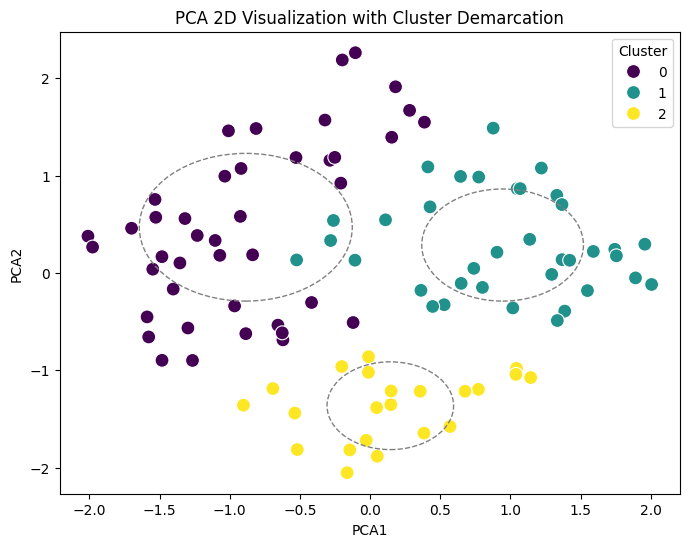

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you already have the 'scaled_data' and 'df' DataFrame

# Check the number of features
num_features = scaled_data.shape[1]

# If the number of features is less than 3, reduce PCA components to match
n_components = min(3, num_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_columns = [f"PCA{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(pca_components, columns=pca_columns)

# Add the cluster labels
df_pca["Cluster"] = df["Cluster"]

# 2D or 3D Visualization based on the number of components
if n_components == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)

    # Draw circles around clusters
    for cluster in df_pca["Cluster"].unique():
        cluster_data = df_pca[df_pca["Cluster"] == cluster]
        center = cluster_data[["PCA1", "PCA2"]].mean()
        radius = cluster_data[["PCA1", "PCA2"]].std().mean()  # Using the standard deviation as radius
        circle = plt.Circle((center["PCA1"], center["PCA2"]), radius, color='gray', fill=False, linestyle="--")
        plt.gca().add_patch(circle)

    plt.title("PCA 2D Visualization with Cluster Demarcation")
    plt.show()

else:  # For 3D visualization
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(df_pca["PCA1"], df_pca["PCA2"], df_pca["PCA3"], c=df_pca["Cluster"], cmap="viridis", s=100)

    # Draw circles around clusters (approximating a circle in 3D)
    for cluster in df_pca["Cluster"].unique():
        cluster_data = df_pca[df_pca["Cluster"] == cluster]
        center = cluster_data[["PCA1", "PCA2", "PCA3"]].mean()
        radius = cluster_data[["PCA1", "PCA2", "PCA3"]].std().mean()  # Using the standard deviation as radius
        ax.scatter(center["PCA1"], center["PCA2"], center["PCA3"], c='red', marker='x', s=200)  # Cluster center

        # Create a wireframe circle using the radius (approximation)
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = center["PCA1"] + radius * np.outer(np.cos(u), np.sin(v))
        y = center["PCA2"] + radius * np.outer(np.sin(u), np.sin(v))
        z = center["PCA3"] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_wireframe(x, y, z, color='gray', linestyle="--", linewidth=0.5)

    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.set_title("PCA 3D Visualization with Cluster Demarcation")
    plt.show()


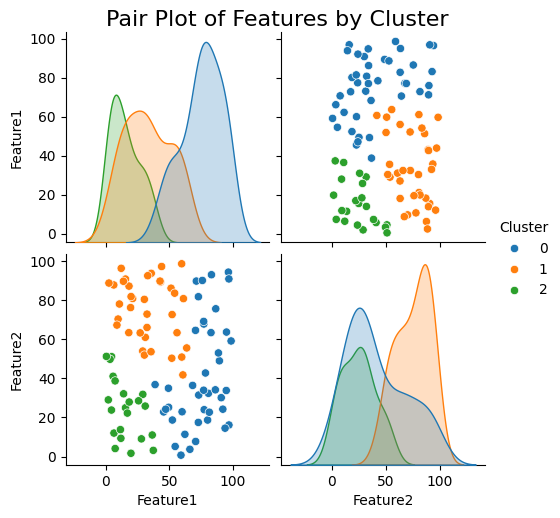

In [31]:
# Check the number of rows in df
n_rows = df.shape[0]

# If there are fewer than 1000 rows, sample all the data
if n_rows < 1000:
    sampled_df = df  # Use all the data
else:
    sampled_df = df.sample(n=1000, random_state=42)

# Pairplot with hue as Cluster
sns.pairplot(sampled_df, hue="Cluster", palette="tab10", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02, fontsize=16)
plt.show()

In [32]:
# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)


Cluster Assignments:
    Heart diseases  Hypertension  Kidney diseases  Obesity  Cancer  Cluster
0               0             1                1        0       0       -1
1               1             0                0        0       0       -1
2               0             0                0        1       0       -1
3               1             1                0        1       0       -1
4               1             1                0        0       1       -1
5               0             0                0        1       0       -1
6               1             0                1        1       0       -1
7               0             0                1        0       0       -1
8               0             1                0        1       0       -1
9               1             1                1        0       1       -1

Number of Noise Points:  10

Validation Metrics:
Silhouette Score: Not applicable (only one cluster or noise)
Calinski-Harabasz Index: Not applicable (o

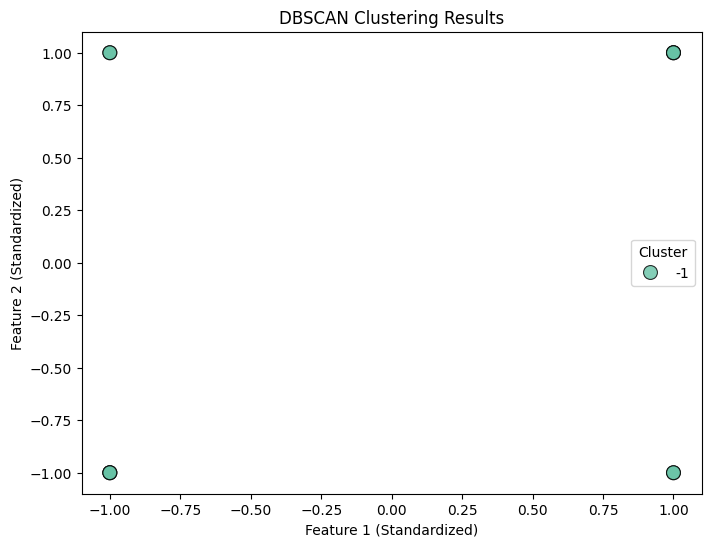

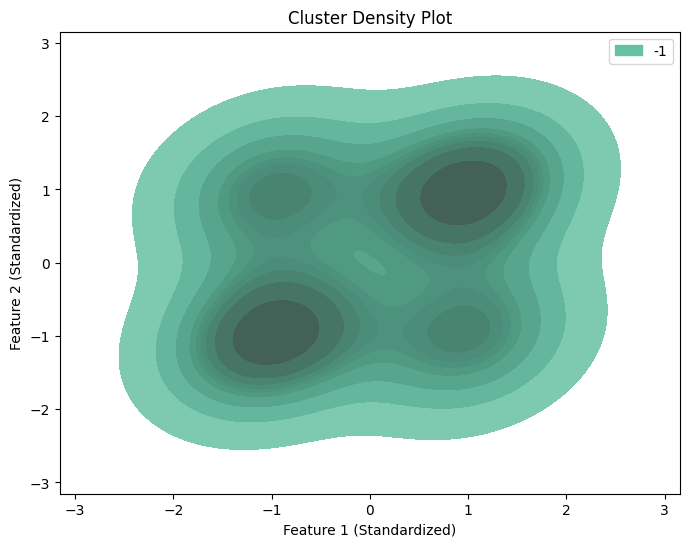

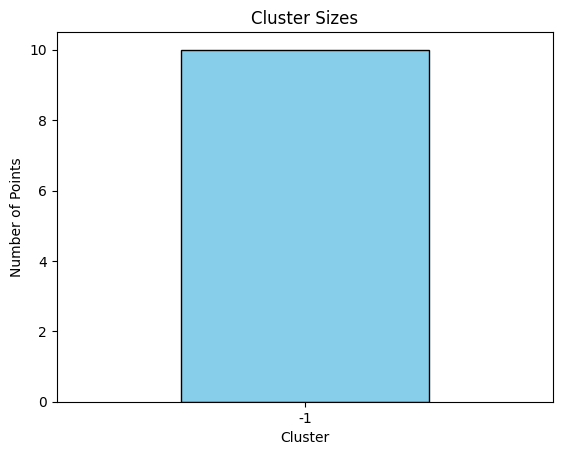

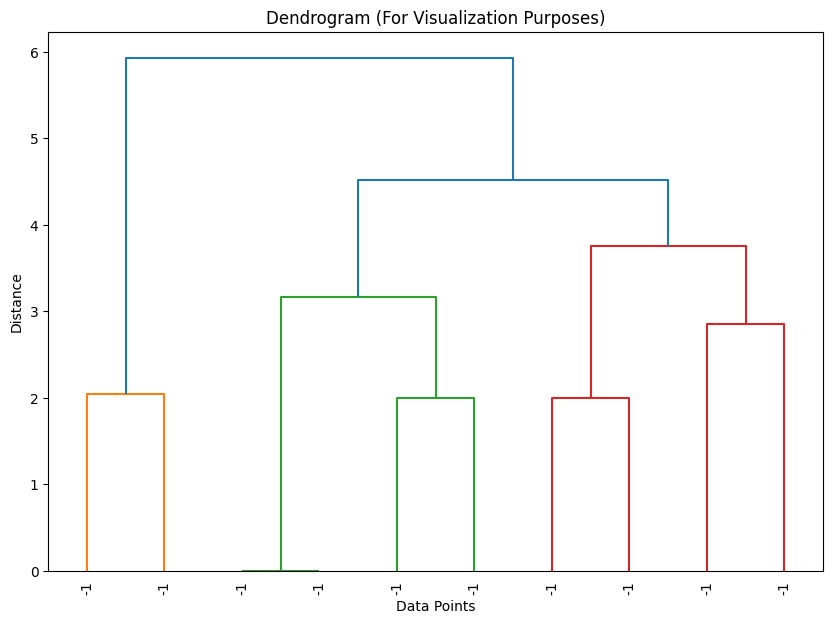

<ipython-input-33-b8ff8fedd668>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Noise", palette="Set2")


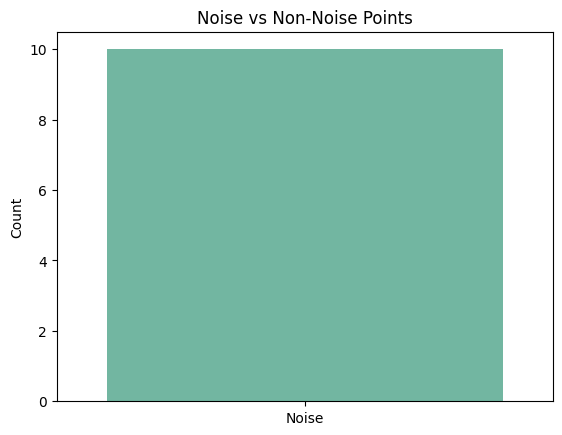

In [33]:
# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
)
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Sample Dataset (Replace with your actual dataset)
data = {
    "Heart diseases": [0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
    "Hypertension": [1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
    "Kidney diseases": [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    "Obesity": [0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
    "Cancer": [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
}
df = pd.DataFrame(data)

# Standardize Data (DBSCAN is sensitive to scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform DBSCAN Clustering
eps = 0.9  # Maximum distance between points in a cluster
min_samples = 3  # Minimum points required to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
labels = dbscan.fit_predict(scaled_data)

# Add Cluster Labels to the DataFrame
df["Cluster"] = labels

# Display Cluster Assignments
print("Cluster Assignments:\n", df)

# Check for Noise (Cluster -1 is noise in DBSCAN)
noise_points = df[df["Cluster"] == -1]
print("\nNumber of Noise Points: ", len(noise_points))

# Validation Metrics
print("\nValidation Metrics:")
# 1. Silhouette Score
if len(np.unique(labels)) > 1 and -1 not in labels:
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette_avg:.2f}")
else:
    print("Silhouette Score: Not applicable (only one cluster or noise)")
# 3. Calinski-Harabasz Index
if len(np.unique(labels)) > 1:
    calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
else:
    print("Calinski-Harabasz Index: Not applicable (only one cluster or noise)")

# 5. Adjusted Rand Index (ARI) (Requires ground truth labels)
true_labels = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]  # Replace with actual ground truth
ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Visualization 1: Scatter Plot with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=labels,
    palette="Set2",
    style=labels,
    s=100,
    alpha=0.8,
    edgecolor="k",
)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.show()

# Visualization 2: Cluster Density
plt.figure(figsize=(8, 6))
sns.kdeplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels, fill=True, palette="Set2")
plt.title("Cluster Density Plot")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

# Visualization 3: Bar Plot for Cluster Sizes
cluster_sizes = df["Cluster"].value_counts().sort_index()
cluster_sizes.plot(kind="bar", color="skyblue", edgecolor="k")
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.xticks(rotation=0)
plt.show()

# Visualization 4: Dendrogram (Optional for DBSCAN)
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
linked = linkage(scaled_data, method="ward")
dendrogram(linked, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (For Visualization Purposes)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Visualization 5: Noise vs Non-Noise
df["Noise"] = df["Cluster"].apply(lambda x: "Noise" if x == -1 else "Cluster")
sns.countplot(data=df, x="Noise", palette="Set2")
plt.title("Noise vs Non-Noise Points")
plt.xlabel("")
plt.ylabel("Count")
plt.show()


In [34]:
# GMM - Expectation Maximization approach
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_scaled' is the dataset you want to apply GMM clustering to
# data_scaled = ... (your scaled dataset)

# Specify the number of clusters
n_clusters = 3  # Adjust based on your dataset

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(data_scaled)

# 1. Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 2. Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(data_scaled, labels)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# 3. Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Silhouette Score: 0.51
Davies-Bouldin Index: 0.75
Calinski-Harabasz Index: 130.29


<ipython-input-36-f761c9109364>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


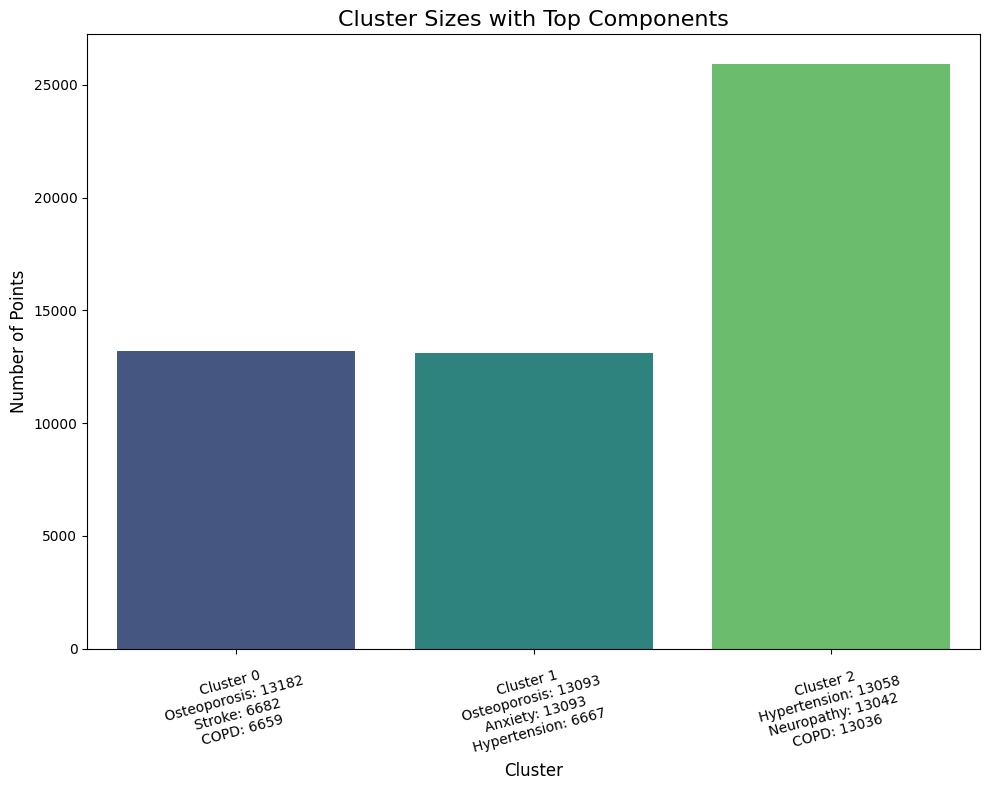

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your dataset with 14 variables
# Example structure of the dataset (replace this with your actual data loading step)
df = pd.DataFrame({
    'Heart diseases': np.random.randint(0, 2, 52217),
    'Hypertension': np.random.randint(0, 2, 52217),
    'Kidney': np.random.randint(0, 2, 52217),
    'Neuropathy': np.random.randint(0, 2, 52217),
    'Obesity': np.random.randint(0, 2, 52217),
    'Stroke': np.random.randint(0, 2, 52217),
    'Retinopathy': np.random.randint(0, 2, 52217),
    'Dyslipidemia': np.random.randint(0, 2, 52217),
    'Osteoporosis': np.random.randint(0, 2, 52217),
    'Anxiety': np.random.randint(0, 2, 52217),
    'Asthma': np.random.randint(0, 2, 52217),
    'Cancer': np.random.randint(0, 2, 52217),
    'Cardiac dysrhythmia': np.random.randint(0, 2, 52217),
    'COPD': np.random.randint(0, 2, 52217)
})

# Scale the data (use all 14 variables for scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Specify the number of clusters
n_clusters = 3  # Adjust based on your data and requirements

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters = gmm.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Count the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Calculate the sum of values for each variable per cluster
cluster_components = df.groupby("Cluster").sum()

# Prepare labels showing components and their counts for each cluster
component_labels = [
    f"Cluster {cluster}\n" +
    "\n".join([f"{var}: {int(count)}" for var, count in cluster_components.loc[cluster].nlargest(3).items()])
    for cluster in cluster_counts.index
]

# Plot cluster sizes with components
plt.figure(figsize=(10, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes with Top Components", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.xticks(
    ticks=cluster_counts.index,
    labels=component_labels,
    fontsize=10,
    rotation=15
)
plt.tight_layout()
plt.show()


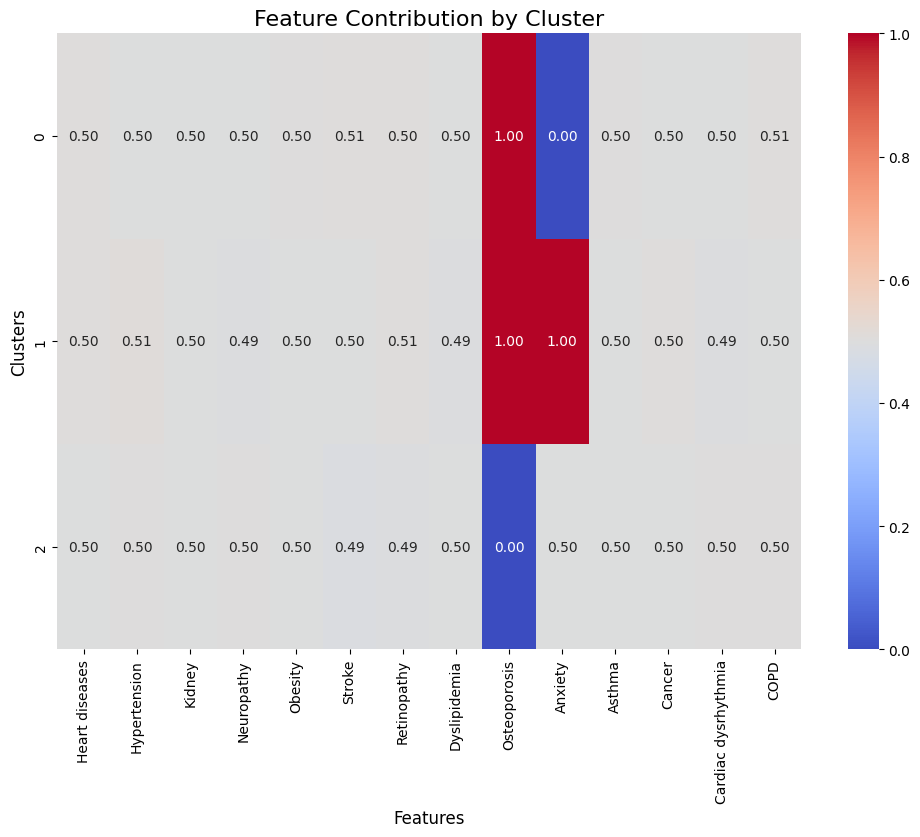

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your dataset and `data_scaled` is your scaled data
# df = ... (your original DataFrame)
# data_scaled = ... (scaled data to use with GMM)

# Specify the number of clusters
n_clusters = 3  # Adjust based on your data

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['Cluster'] = gmm.fit_predict(data_scaled)

# Calculate mean feature values for each cluster
cluster_features = df.groupby("Cluster").mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()


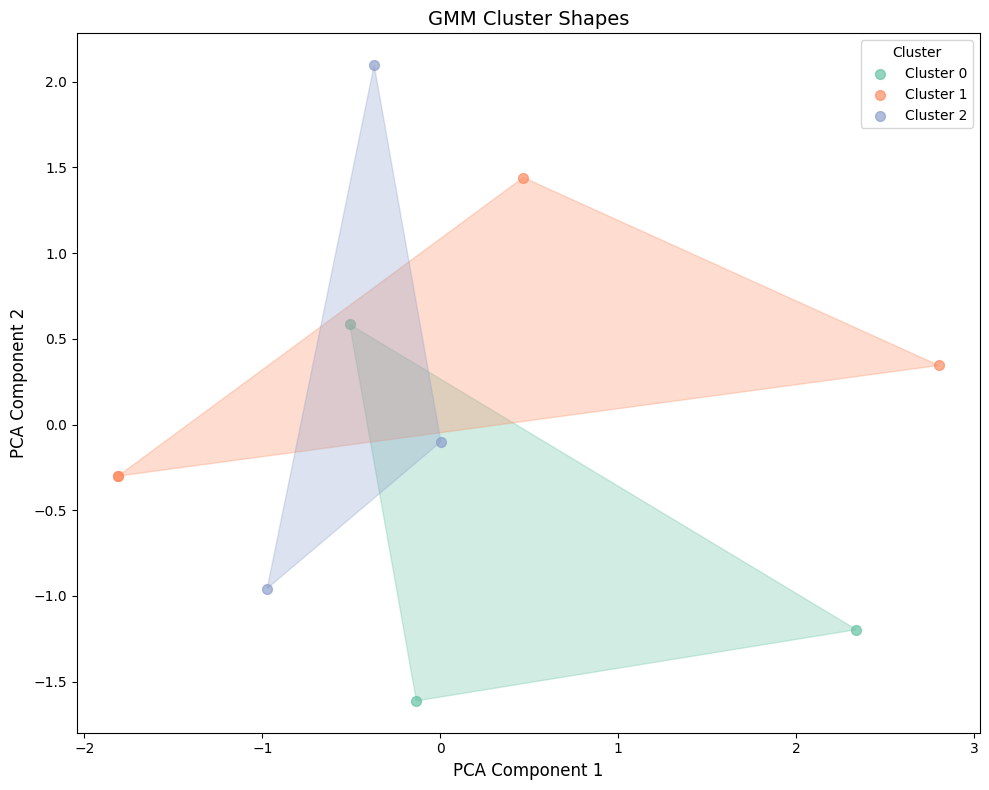

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Assuming `scaled_data` contains the standardized data, and `df['Cluster']` contains GMM cluster labels.

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components and add cluster labels
df_pca = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

# Define a function to plot GMM clusters with convex hulls
def plot_clusters_with_hulls(data, cluster_col, ax):
    clusters = sorted(data[cluster_col].unique())  # Ensure clusters are plotted in order
    palette = sns.color_palette("Set2", len(clusters))

    for i, cluster in enumerate(clusters):
        cluster_data = data[data[cluster_col] == cluster]
        points = cluster_data[["PCA1", "PCA2"]].values

        # Scatter plot for the cluster points
        ax.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster}", color=palette[i], s=50, alpha=0.7)

        # Draw convex hull around the cluster points if there are more than 2 points
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            ax.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.3)

    ax.set_title("GMM Cluster Shapes", fontsize=14)
    ax.set_xlabel("PCA Component 1", fontsize=12)
    ax.set_ylabel("PCA Component 2", fontsize=12)
    ax.legend(title="Cluster", fontsize=10)

# Create a single plot for all clusters with convex hulls
fig, ax = plt.subplots(figsize=(10, 8))
plot_clusters_with_hulls(df_pca, "Cluster", ax)

# Final adjustments and display
plt.tight_layout()
plt.show()


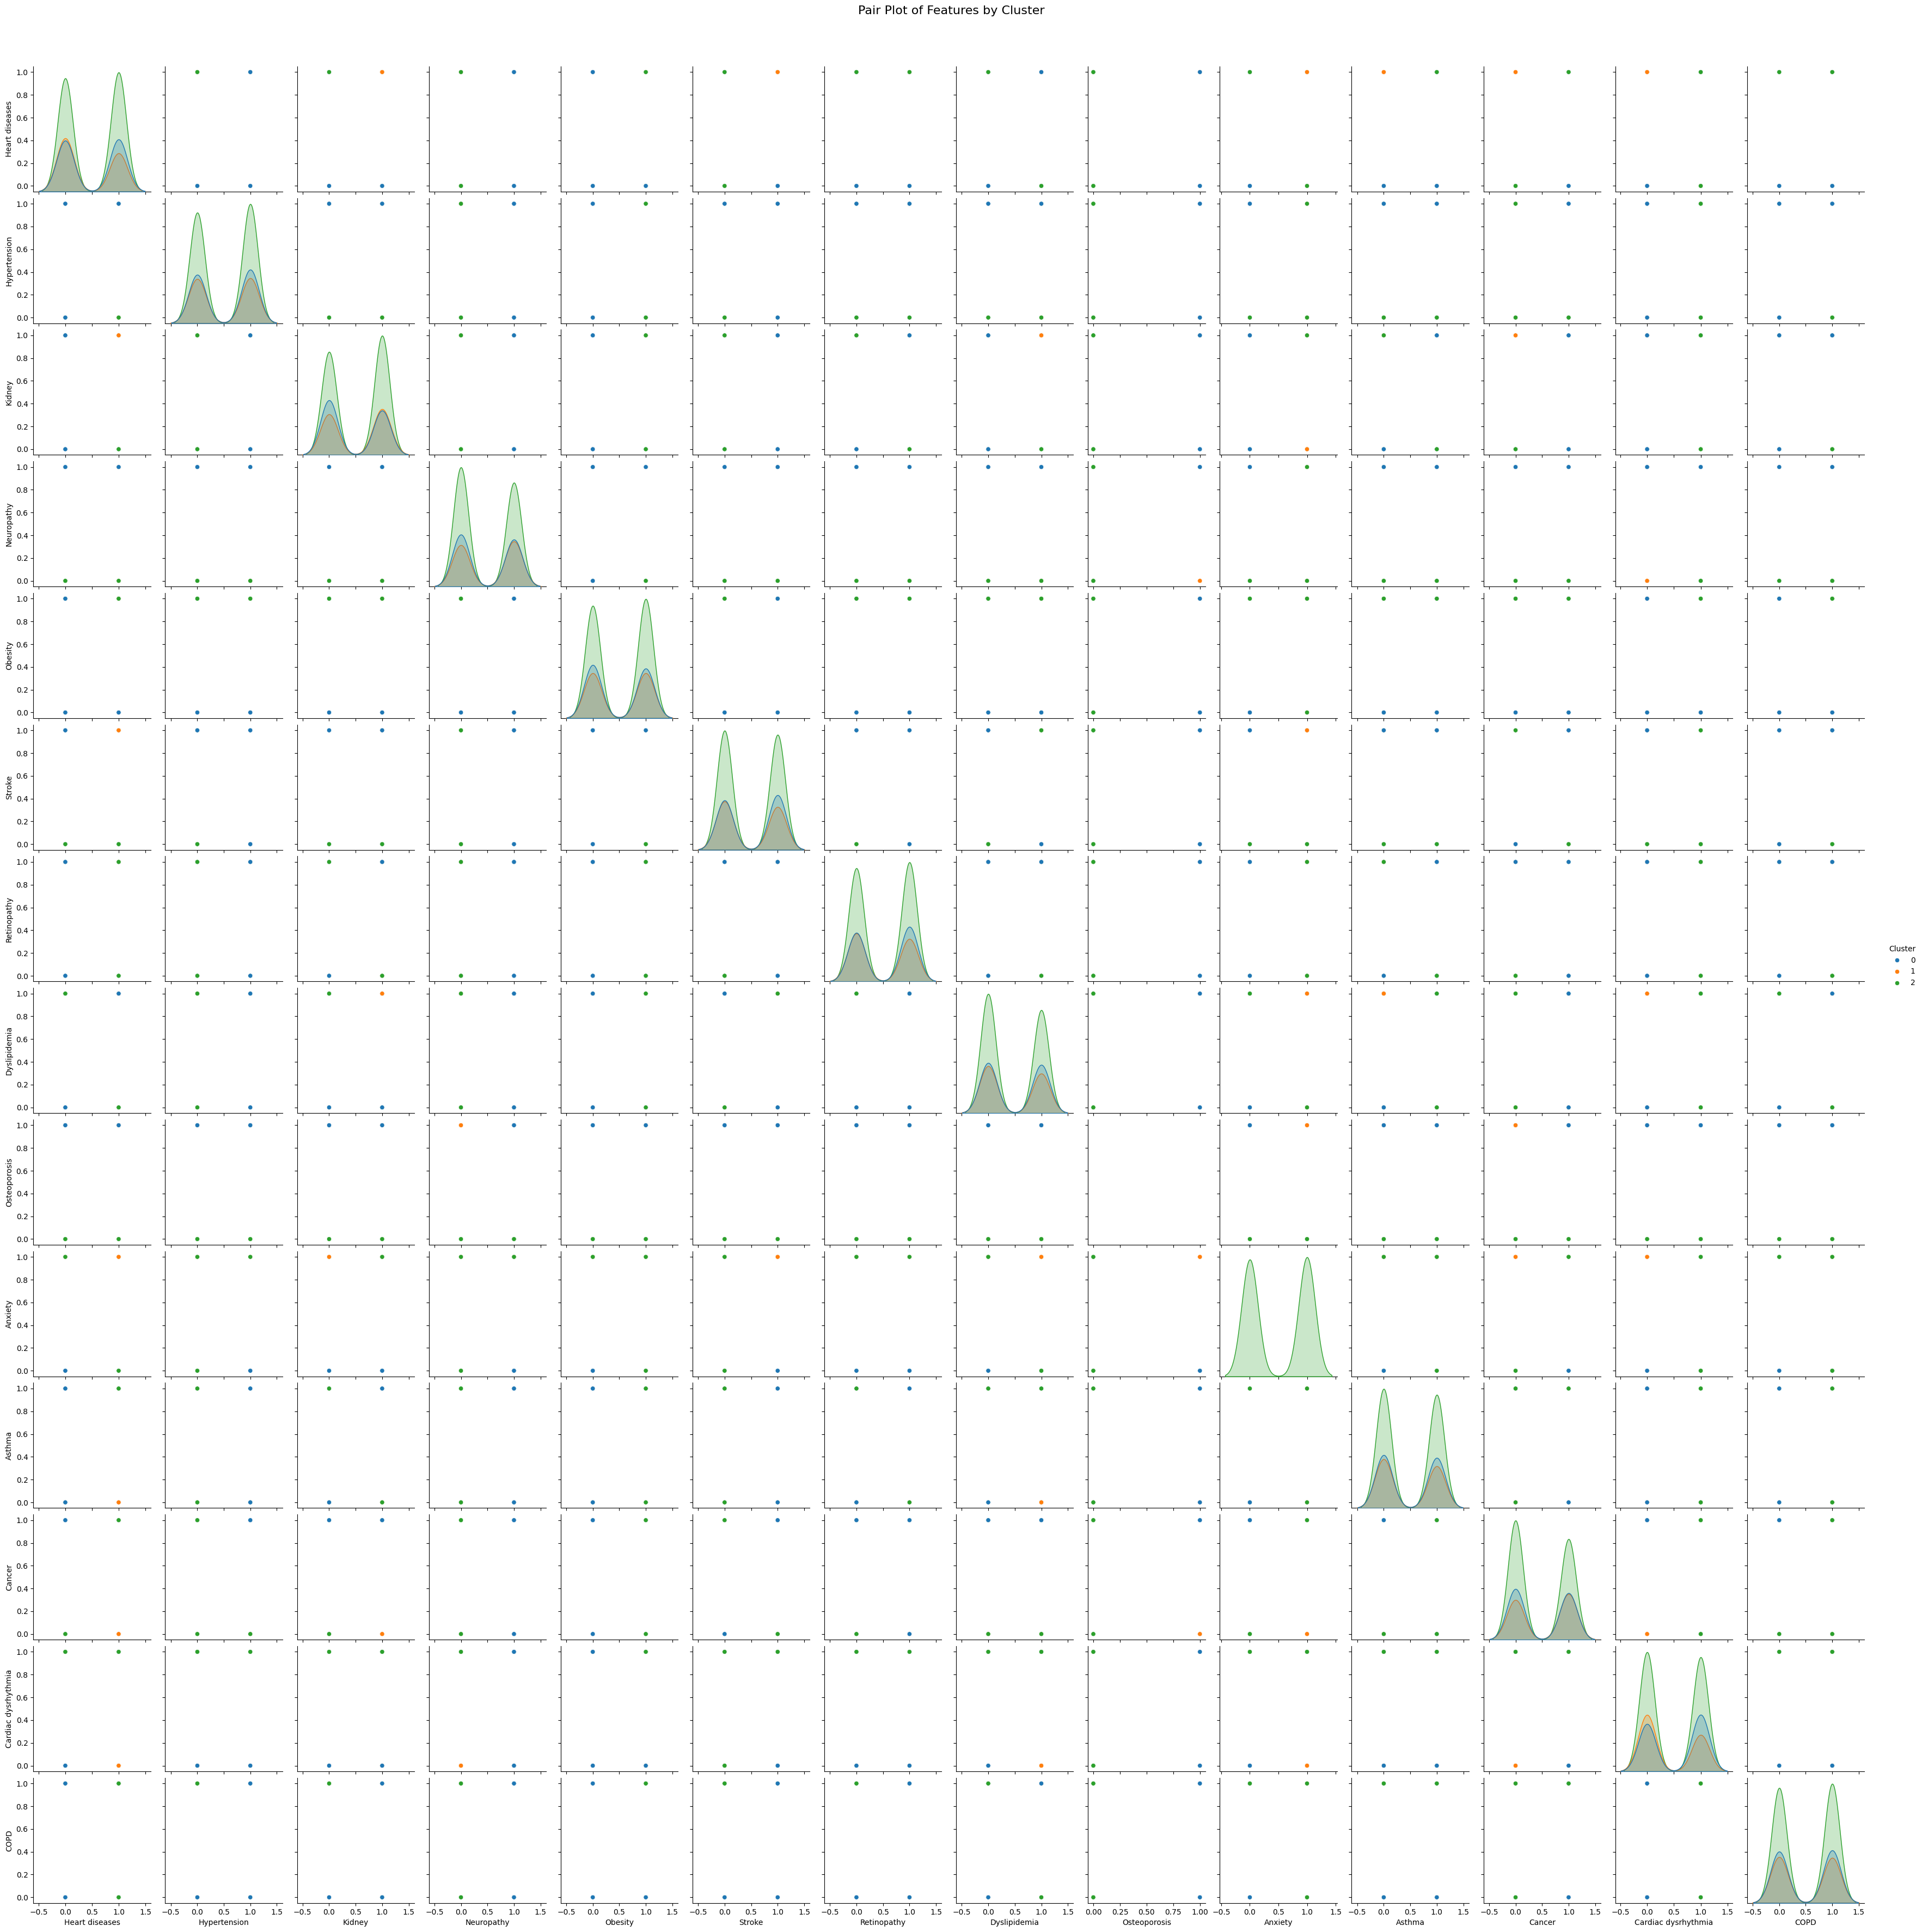

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your original DataFrame and `data_scaled` is your scaled data
# df = ... (your original DataFrame)
# data_scaled = ... (scaled data to use with GMM)

# Specify the number of clusters
n_clusters = 3  # Set the number of clusters to 3 for clusters 0, 1, and 2

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['Cluster'] = gmm.fit_predict(data_scaled)

# Check the number of rows in df
n_rows = df.shape[0]

# If there are fewer than 1000 rows, sample all the data
if n_rows < 1000:
    sampled_df = df  # Use all the data
else:
    sampled_df = df.sample(n=1000, random_state=42)

# Pairplot with hue as Cluster (Clusters 0, 1, and 2)
sns.pairplot(sampled_df, hue="Cluster", palette="tab10", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02, fontsize=16)
plt.show()


Dataset Shape: (52217, 15)
Dataset Columns:
Index(['Heart diseases', 'Hypertension', 'Kidney', 'Neuropathy', 'Obesity',
       'Stroke', 'Retinopathy', 'Dyslipidemia', 'Osteoporosis', 'Anxiety',
       'Asthma', 'Cancer', 'Cardiac dysrhythmia', 'COPD', 'Cluster'],
      dtype='object')
Silhouette Score: 0.06
Davies-Bouldin Index: 3.32
Calinski-Harabasz Index: 2646.84


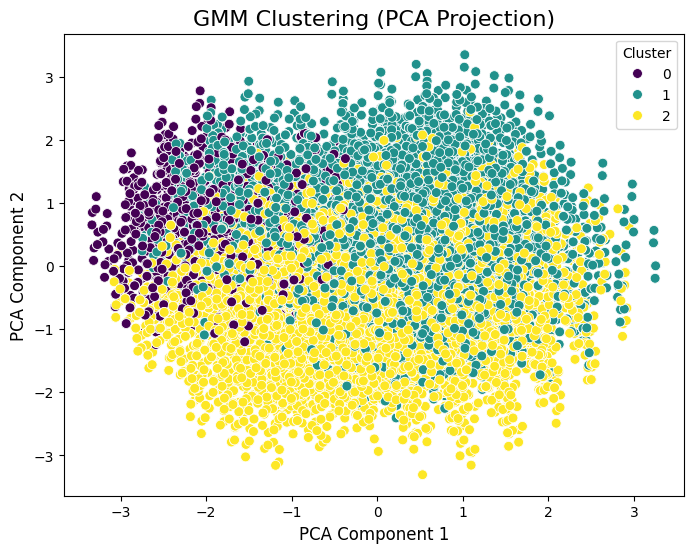

Dataset Shape: (52217, 15)
Dataset Columns:
Index(['Heart diseases', 'Hypertension', 'Kidney', 'Neuropathy', 'Obesity',
       'Stroke', 'Retinopathy', 'Dyslipidemia', 'Osteoporosis', 'Anxiety',
       'Asthma', 'Cancer', 'Cardiac dysrhythmia', 'COPD', 'Cluster'],
      dtype='object')
Silhouette Score: 0.07
Davies-Bouldin Index: 3.18
Calinski-Harabasz Index: 2248.66


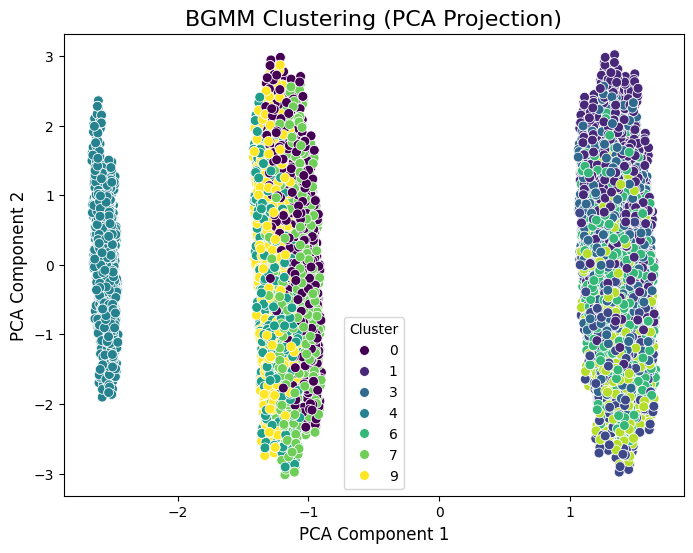

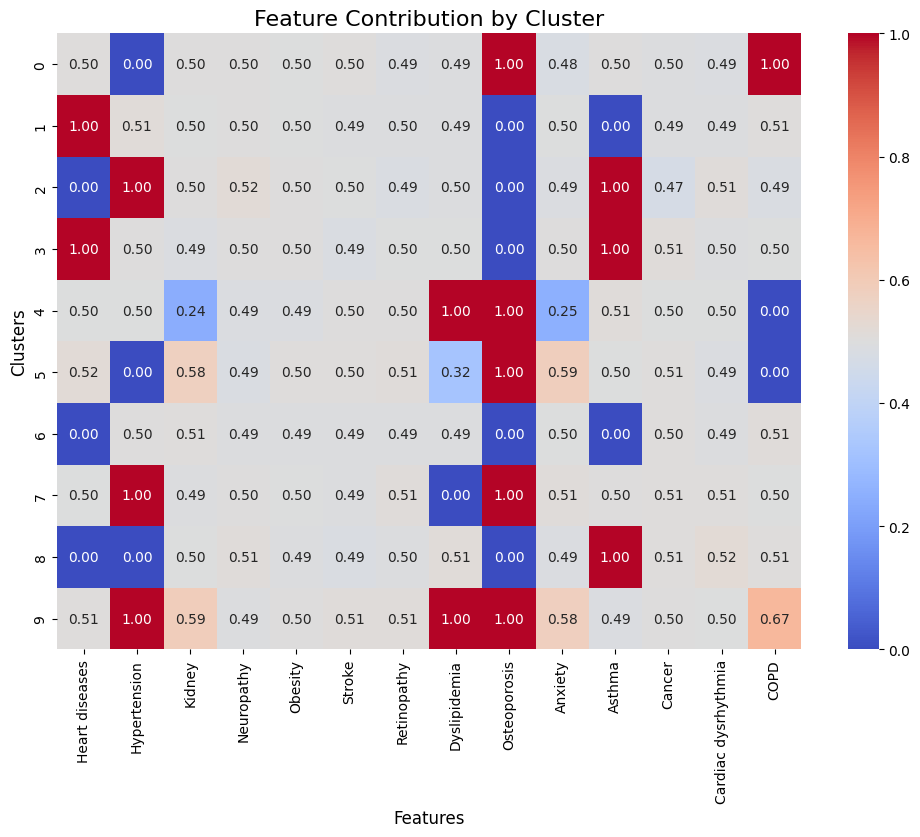

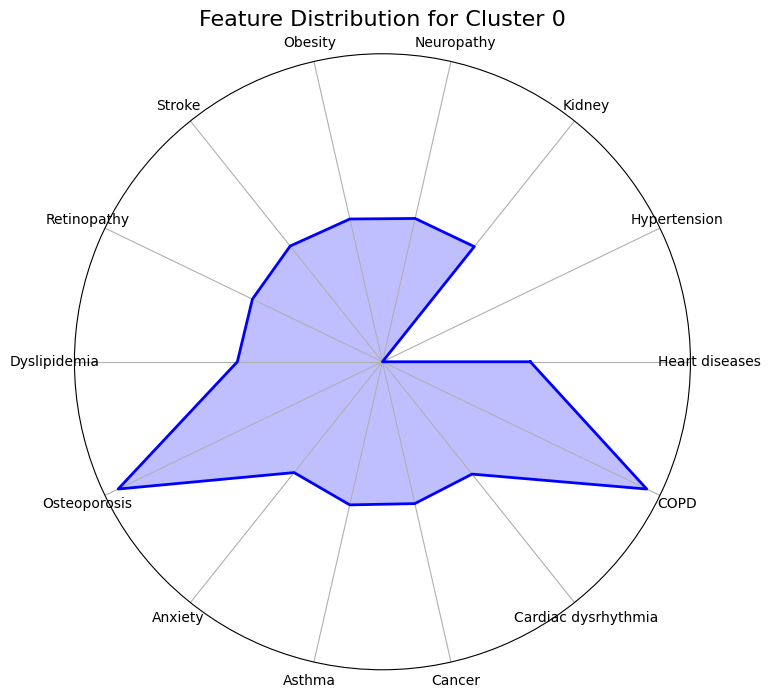

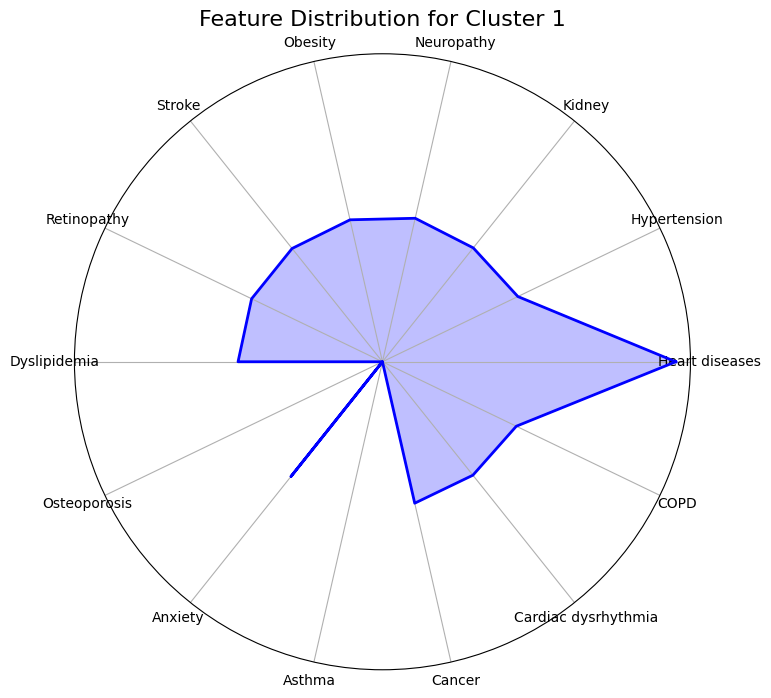

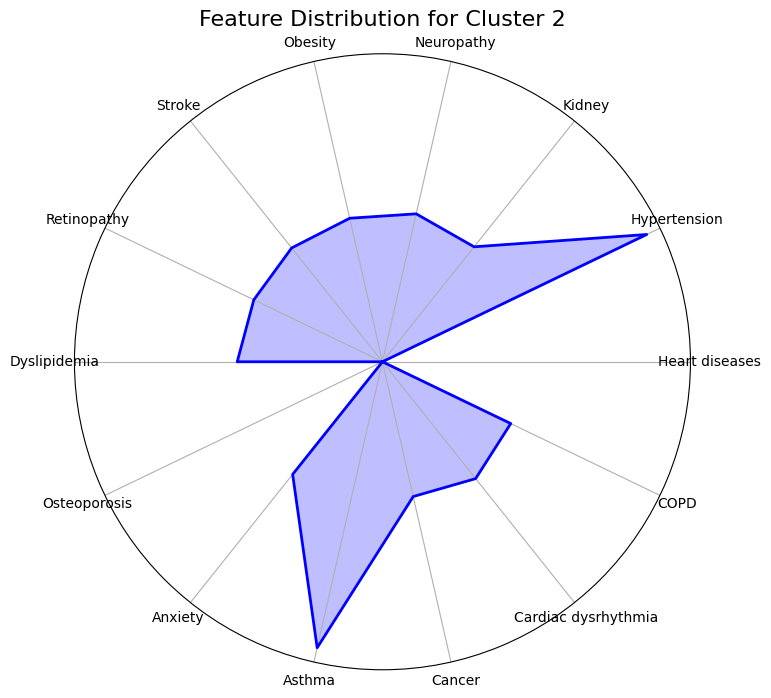

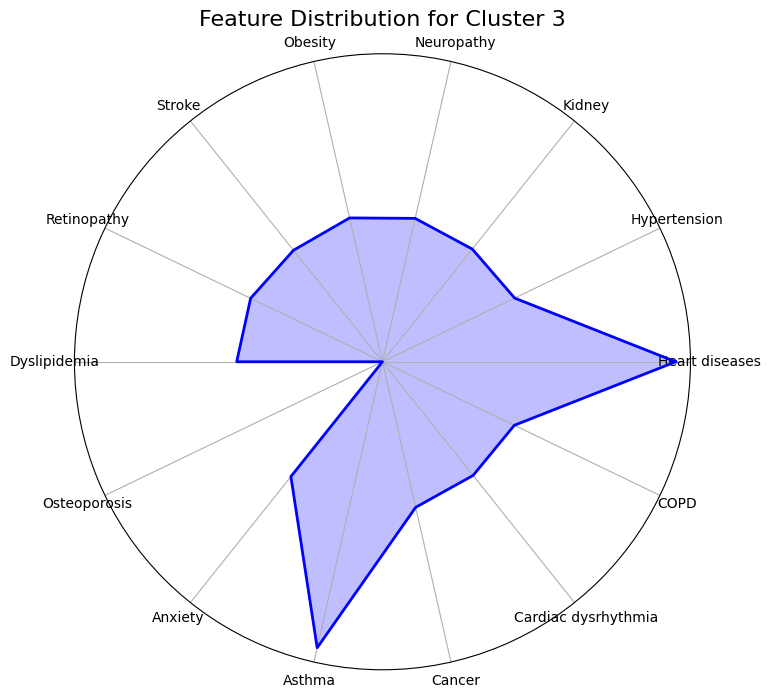

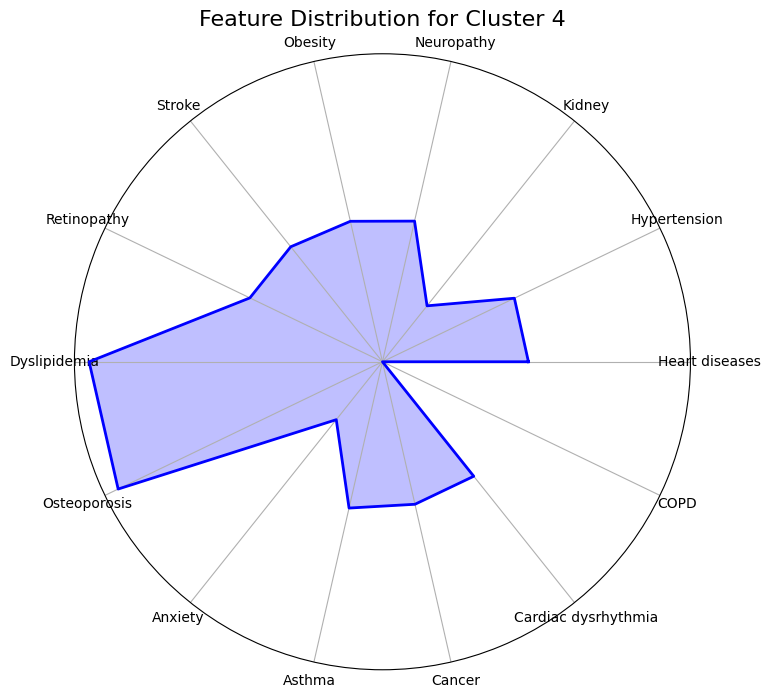

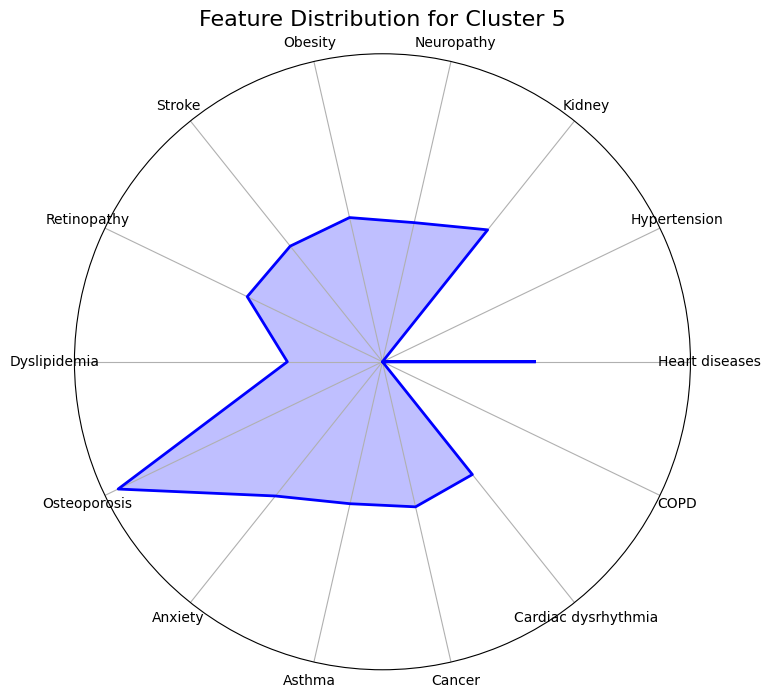

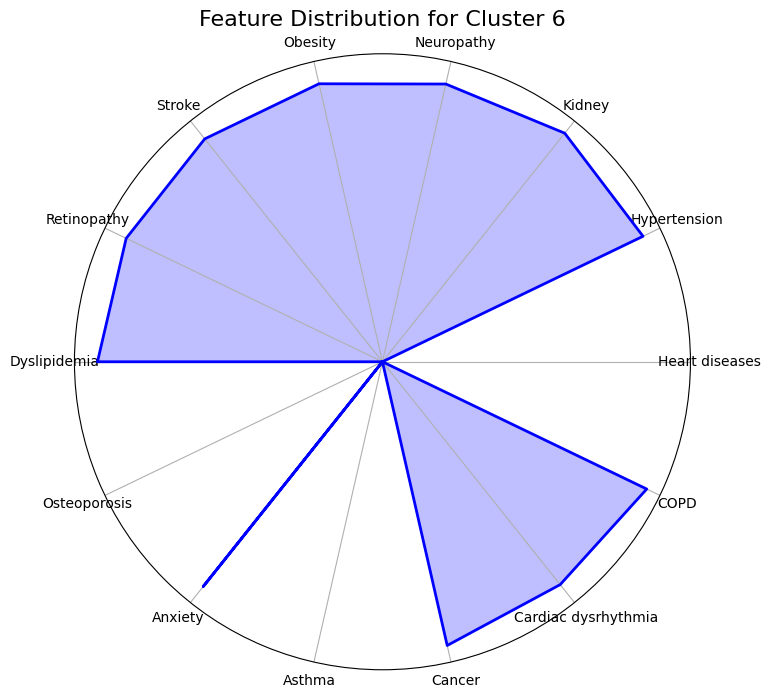

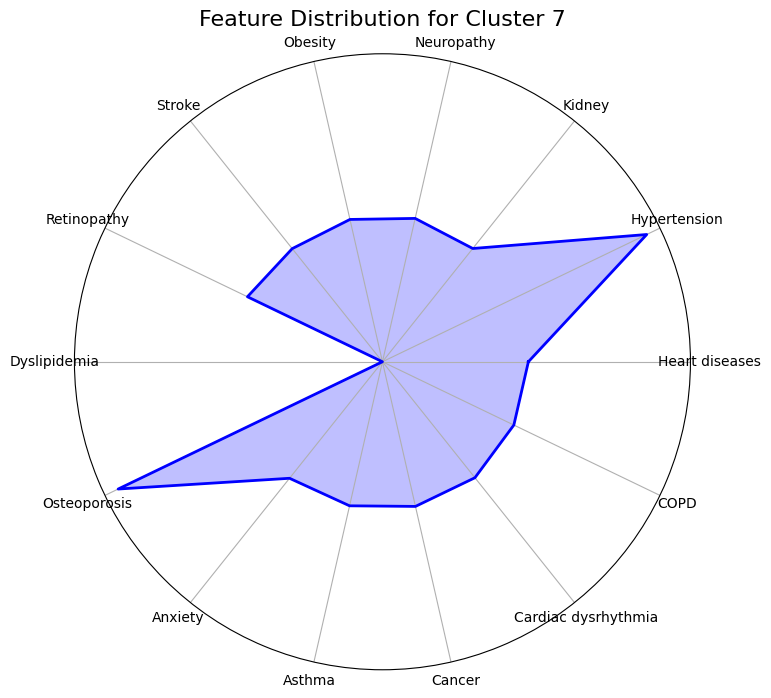

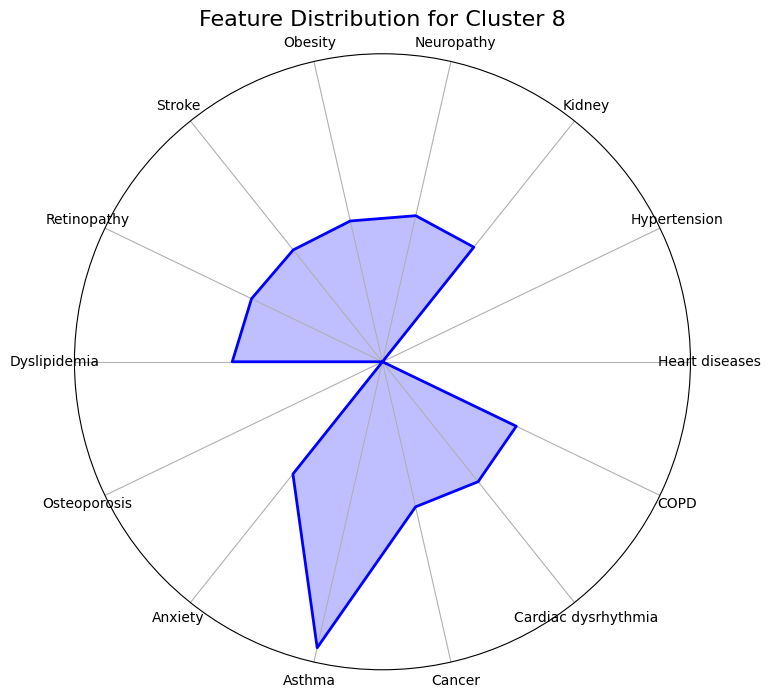

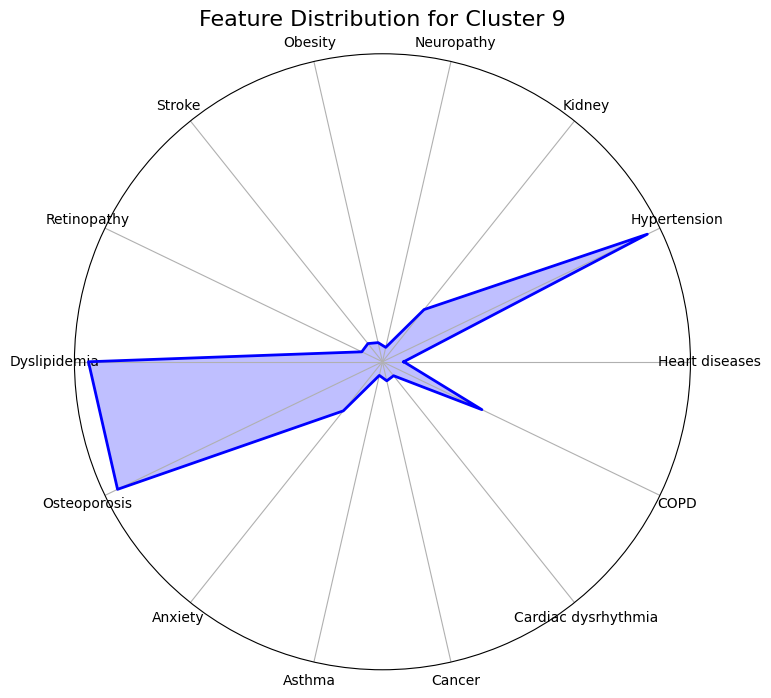

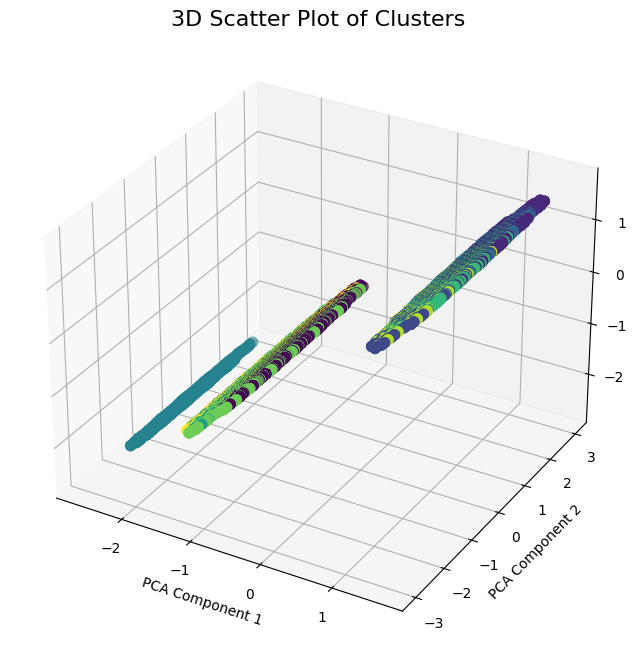

<ipython-input-43-2875c1a71760>:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


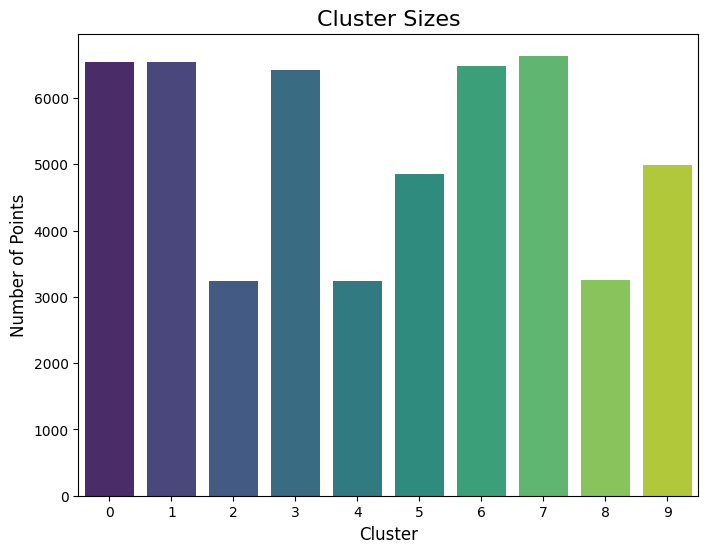

Cluster Weights (Posterior Probabilities): [0.12522502 0.12524143 0.06210207 0.12314749 0.06219398 0.09309594
 0.12407104 0.12712598 0.06227269 0.09552435]


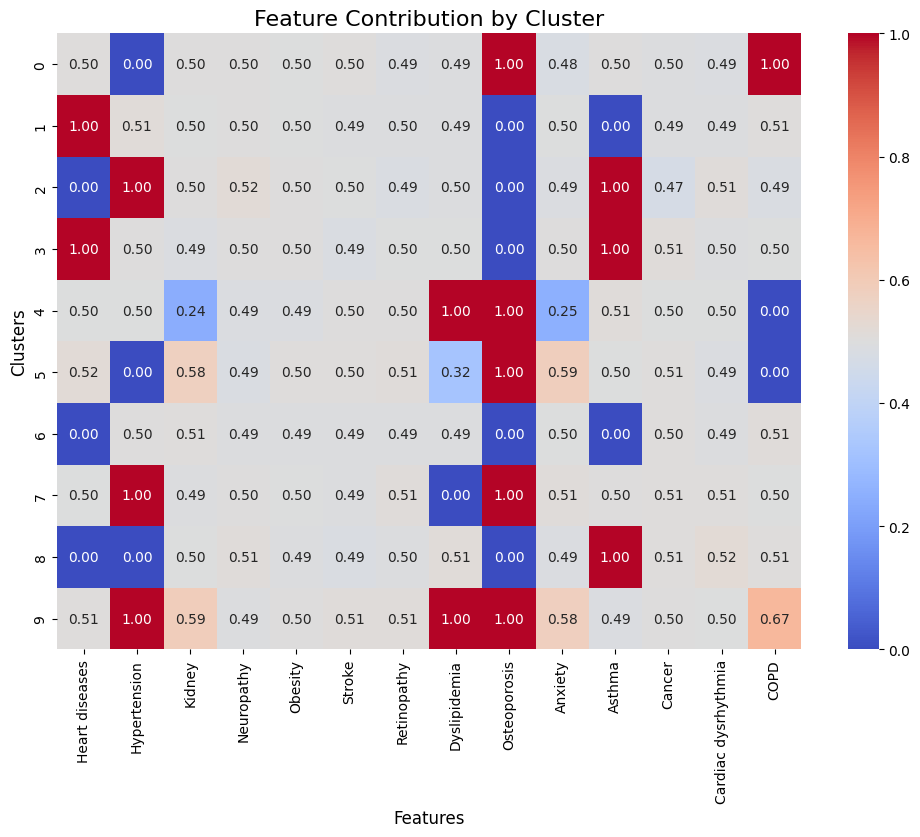

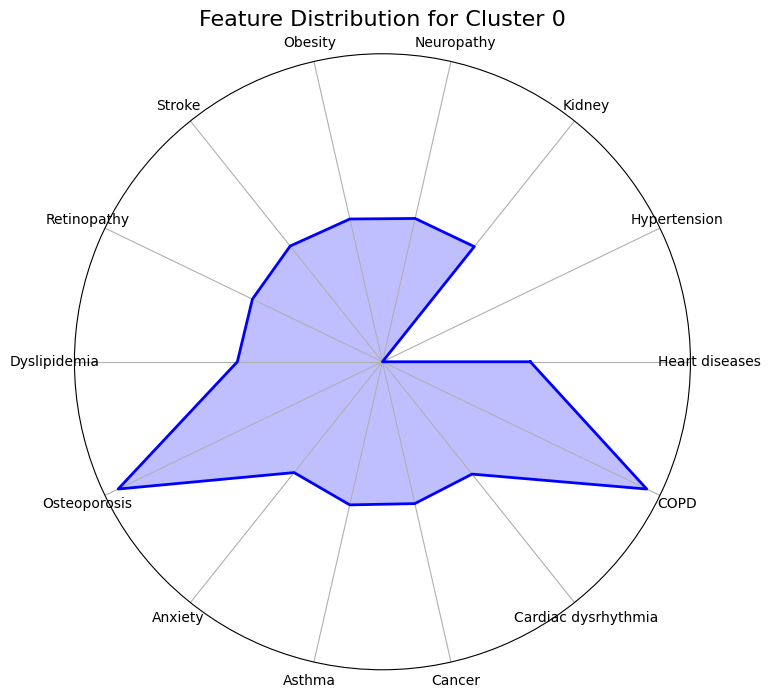

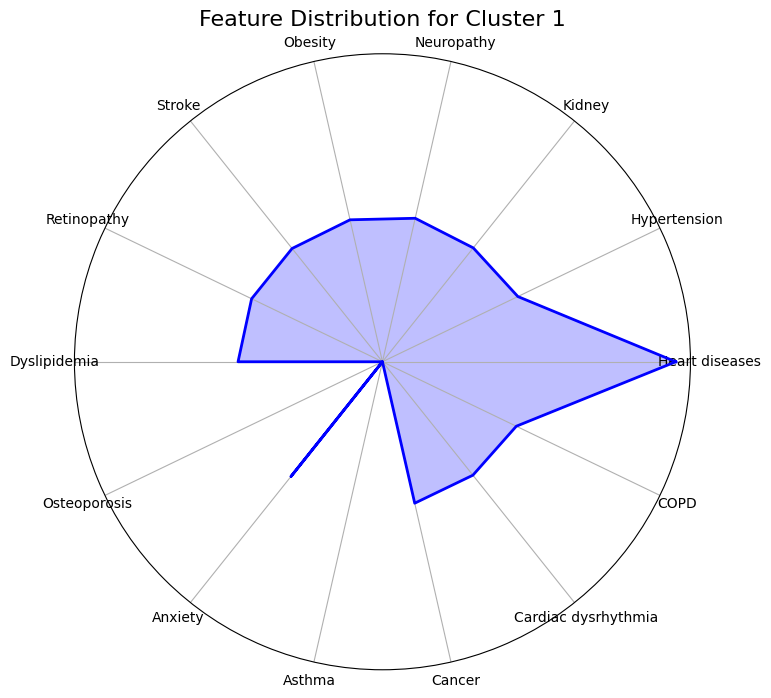

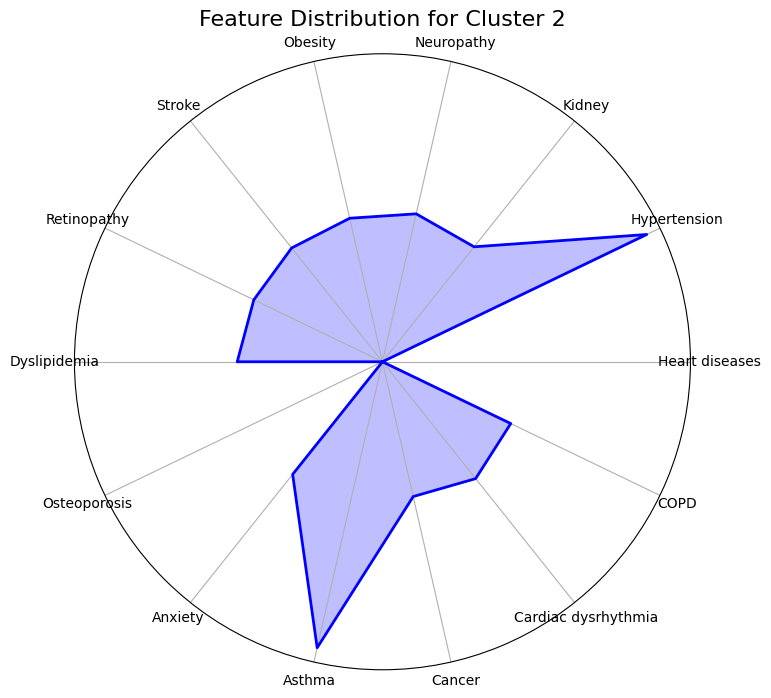

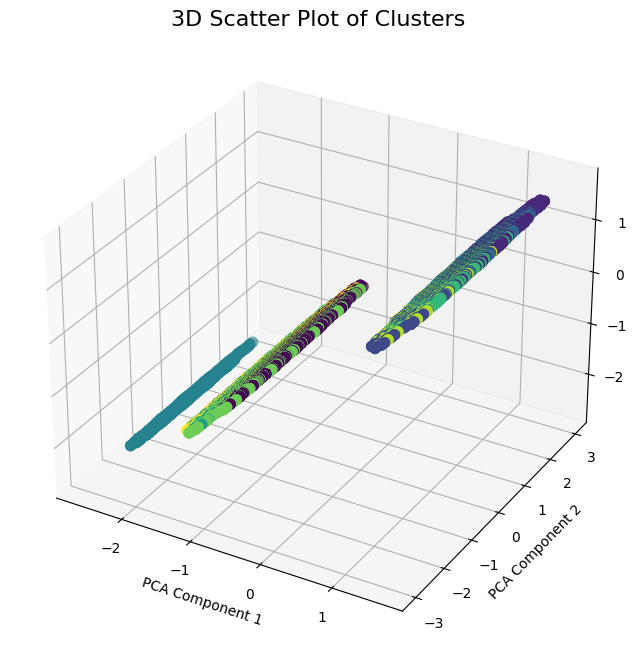

<ipython-input-43-2875c1a71760>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


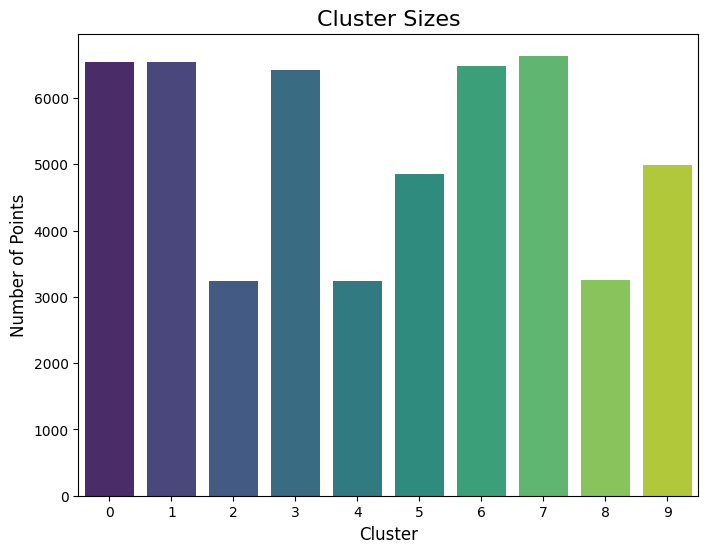

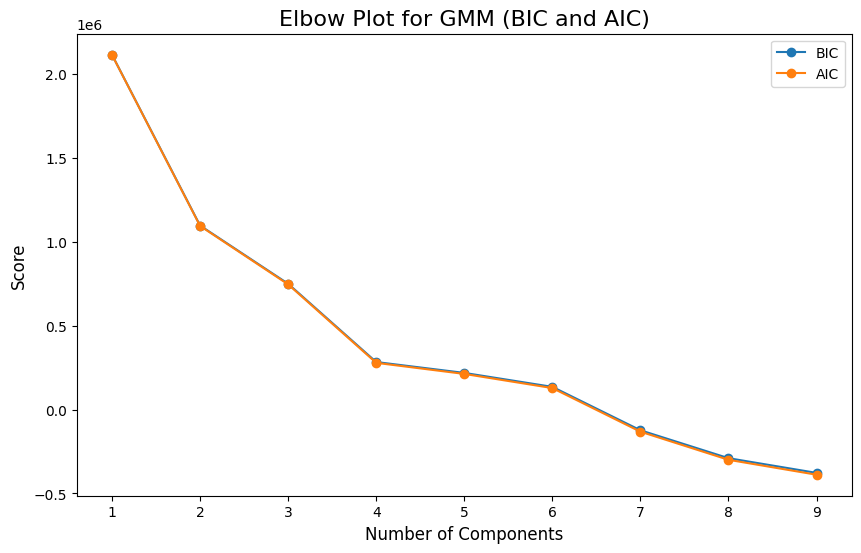

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Display dataset information
print(f"Dataset Shape: {df.shape}")  # Check if it has 14 columns
print("Dataset Columns:")
print(df.columns)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply Gaussian Mixture Model
n_clusters = 3  # Set the number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(data_scaled)
df['Cluster'] = labels

# Validation Metrics
silhouette_avg = silhouette_score(data_scaled, labels)
dbi = davies_bouldin_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {dbi:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Visualization 1: Scatter Plot with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.title("GMM Clustering (PCA Projection)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Display dataset information
print(f"Dataset Shape: {df.shape}")  # Check if it has 14 columns
print("Dataset Columns:")
print(df.columns)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply Bayesian Gaussian Mixture Model
n_components = 10  # Maximum number of clusters to be considered
bgmm = BayesianGaussianMixture(
    n_components=n_components,
    covariance_type="full",
    random_state=42
)
labels = bgmm.fit_predict(data_scaled)
df['Cluster'] = labels

# Validation Metrics
silhouette_avg = silhouette_score(data_scaled, labels)
dbi = davies_bouldin_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {dbi:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Visualization 1: Scatter Plot with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.title("BGMM Clustering (PCA Projection)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.show()

# Visualization 3: Heatmap of Cluster Means
cluster_features = df.groupby("Cluster").mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()

# Visualization 4: Radar Chart for Each Cluster
for cluster_id in range(len(cluster_features)):
    cluster_means = cluster_features.loc[cluster_id]
    categories = cluster_means.index
    values = cluster_means.values
    values = np.append(values, values[0])  # Close the radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart

    # Plot radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.25)
    ax.plot(angles, values, color="blue", linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f"Feature Distribution for Cluster {cluster_id}", fontsize=16, pad=20)
    plt.show()

# Visualization 5: 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 0], c=labels, cmap='viridis', s=50)
ax.set_title("3D Scatter Plot of Clusters", fontsize=16)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

# Visualization 6: Bar Plot for Cluster Sizes
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.show()

# Visualization 7: Evidence for Clusters
# BayesianGaussianMixture does not use BIC/AIC in the same way as GMM,
# so we don't calculate these here. Instead, use posterior probabilities:
cluster_weights = bgmm.weights_
print(f"Cluster Weights (Posterior Probabilities): {cluster_weights}")


# Visualization 3: Heatmap of Cluster Means
cluster_features = df.groupby("Cluster").mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()

# Visualization 4: Radar Chart for Each Cluster
for cluster_id in range(n_clusters):
    cluster_means = cluster_features.loc[cluster_id]
    categories = cluster_means.index
    values = cluster_means.values
    values = np.append(values, values[0])  # Close the radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart

    # Plot radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.25)
    ax.plot(angles, values, color="blue", linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f"Feature Distribution for Cluster {cluster_id}", fontsize=16, pad=20)
    plt.show()

# Visualization 5: 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 0], c=labels, cmap='viridis', s=50)
ax.set_title("3D Scatter Plot of Clusters", fontsize=16)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

# Visualization 6: Bar Plot for Cluster Sizes
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.show()

# Visualization 7: Elbow Plot for GMM
bic_scores = []
aic_scores = []
n_components = range(1, 10)
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))
    aic_scores.append(gmm.aic(data_scaled))

plt.figure(figsize=(10, 6))
plt.plot(n_components, bic_scores, label='BIC', marker='o')
plt.plot(n_components, aic_scores, label='AIC', marker='o')
plt.xticks(n_components)
plt.title("Elbow Plot for GMM (BIC and AIC)", fontsize=16)
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.show()


Dataset Shape: (52217, 15)
Dataset Columns:
Index(['Heart diseases', 'Hypertension', 'Kidney', 'Neuropathy', 'Obesity',
       'Stroke', 'Retinopathy', 'Dyslipidemia', 'Osteoporosis', 'Anxiety',
       'Asthma', 'Cancer', 'Cardiac dysrhythmia', 'COPD', 'Cluster'],
      dtype='object')
Silhouette Score: 0.08
Davies-Bouldin Index: 2.85
Calinski-Harabasz Index: 968.67


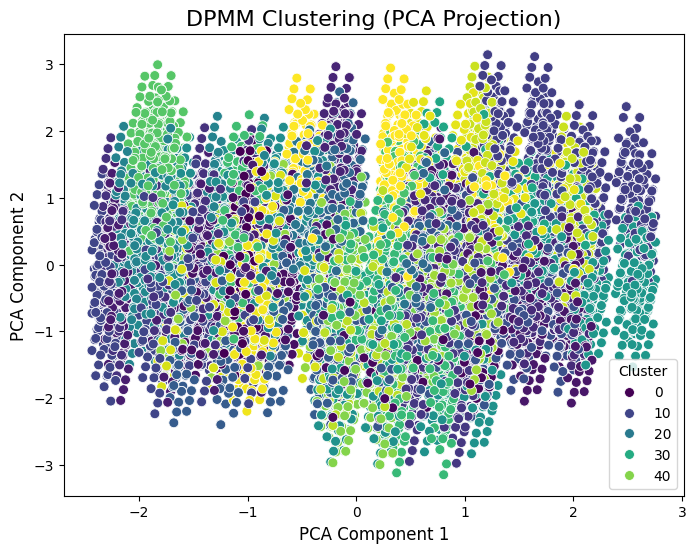

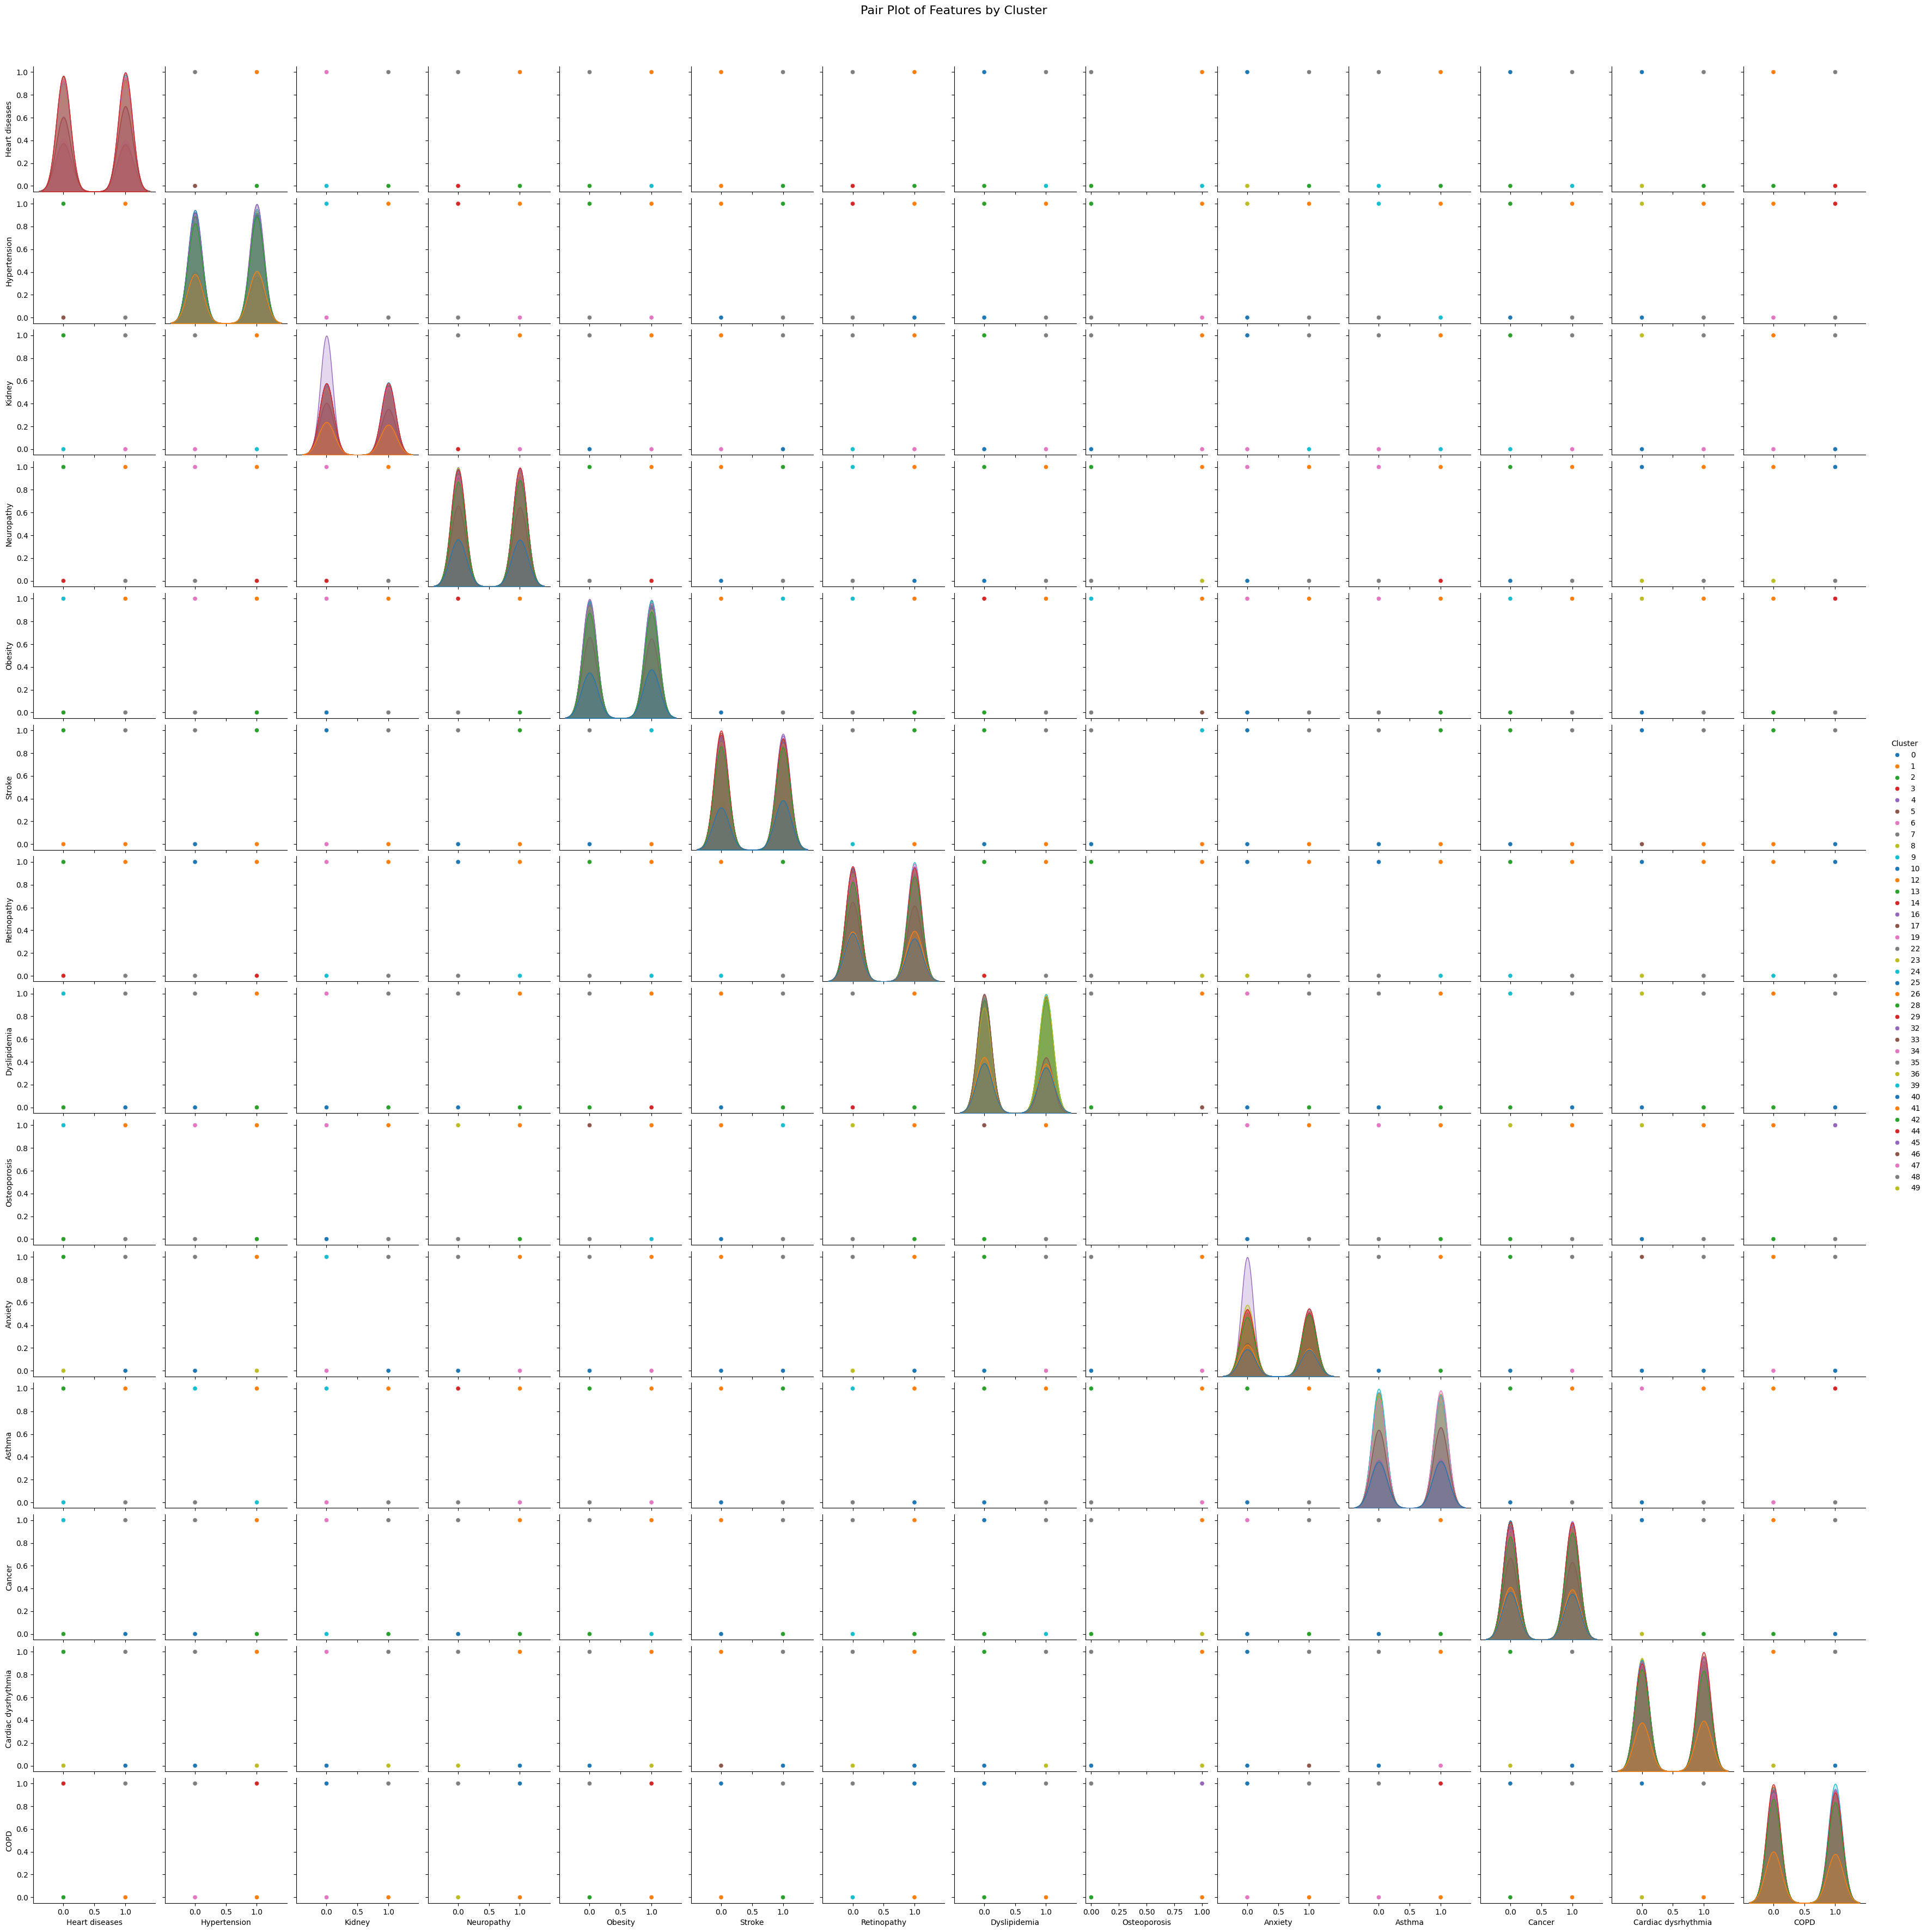

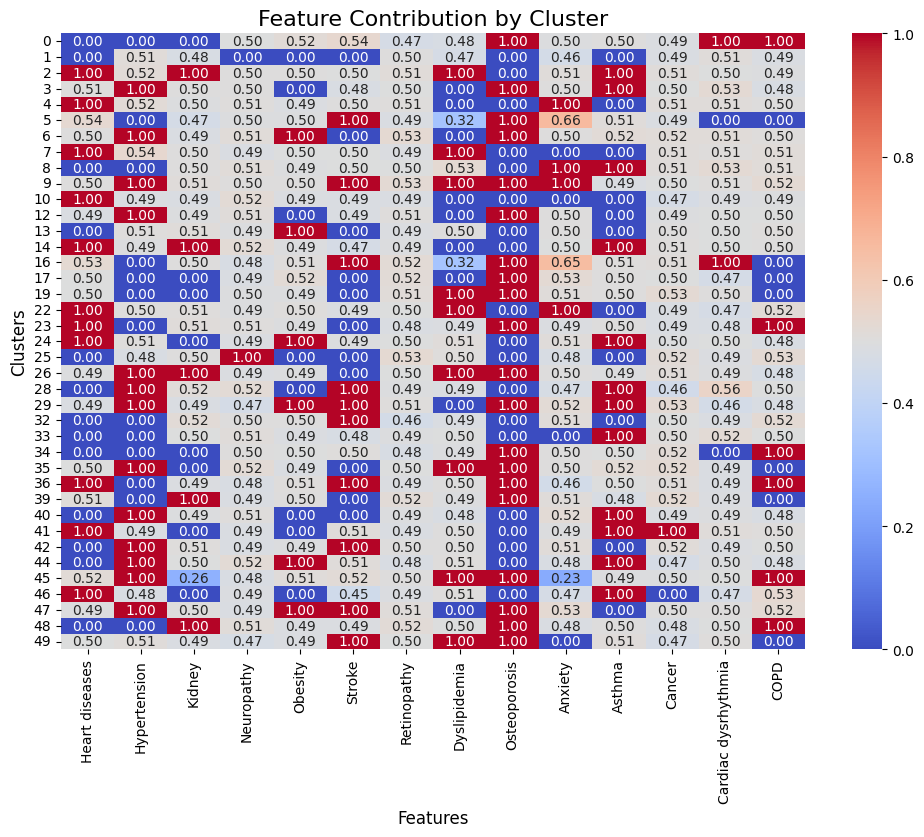

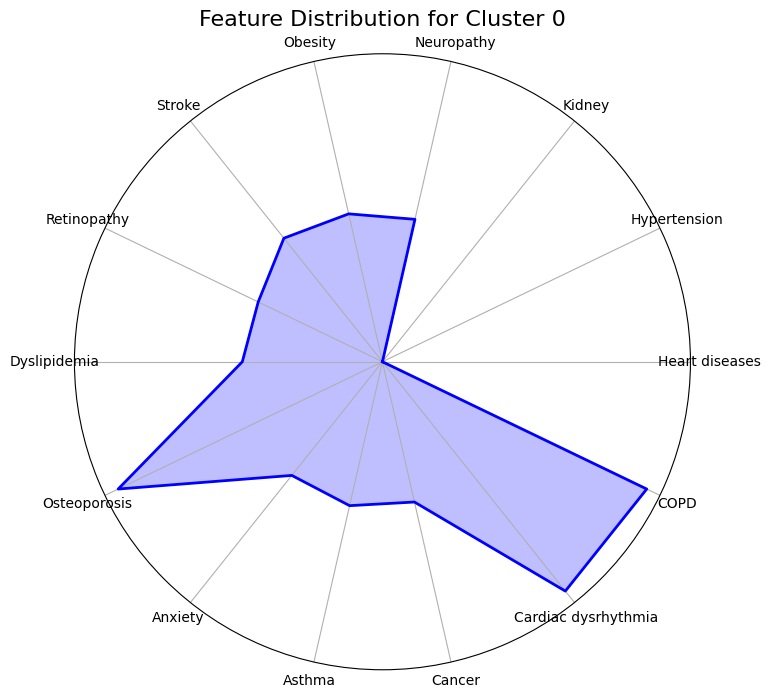

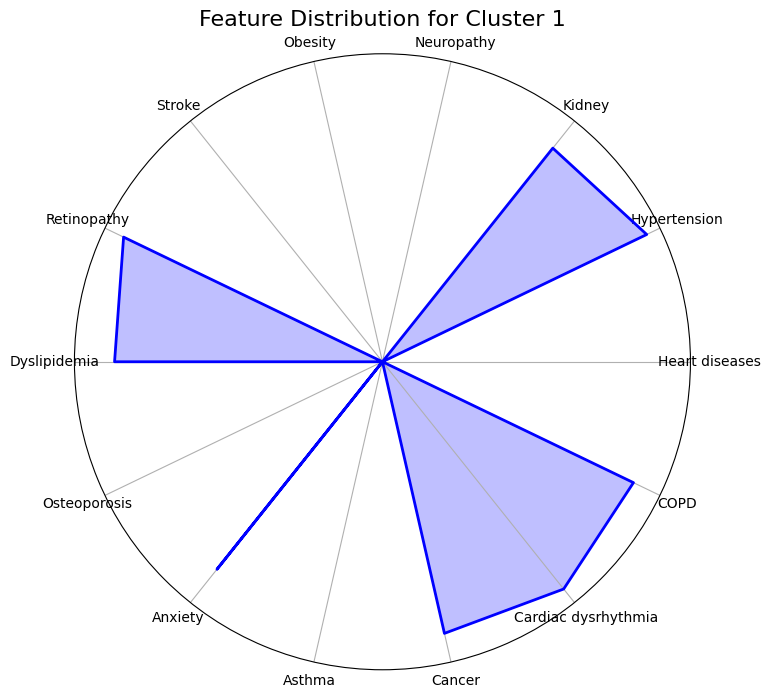

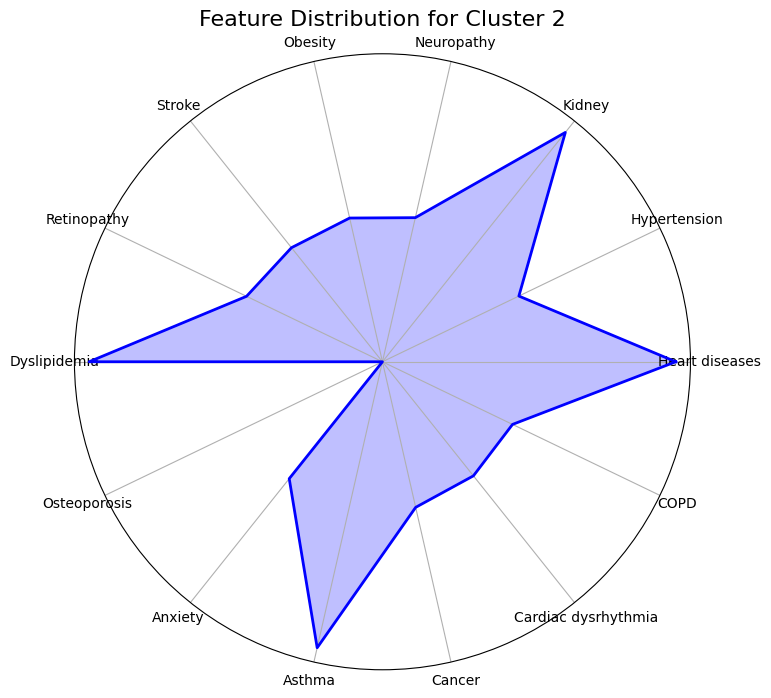

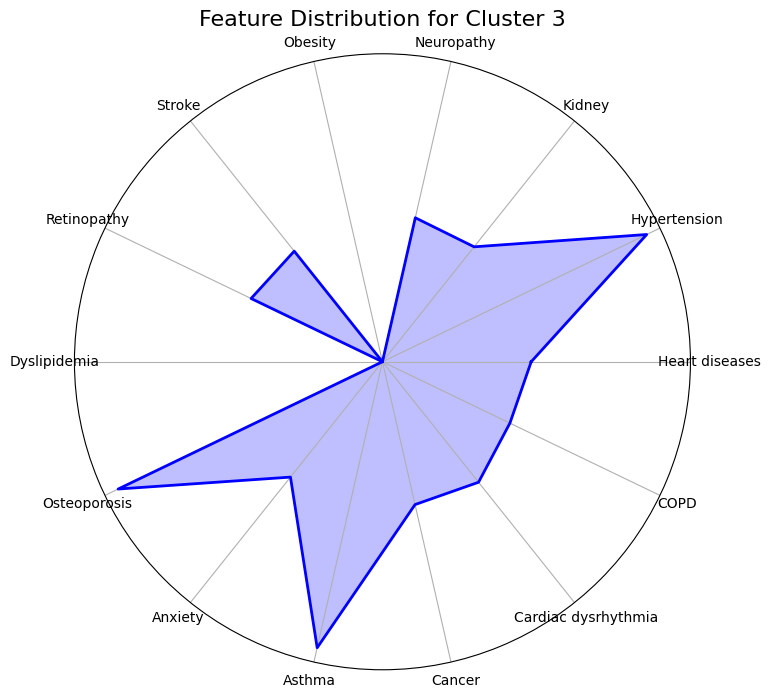

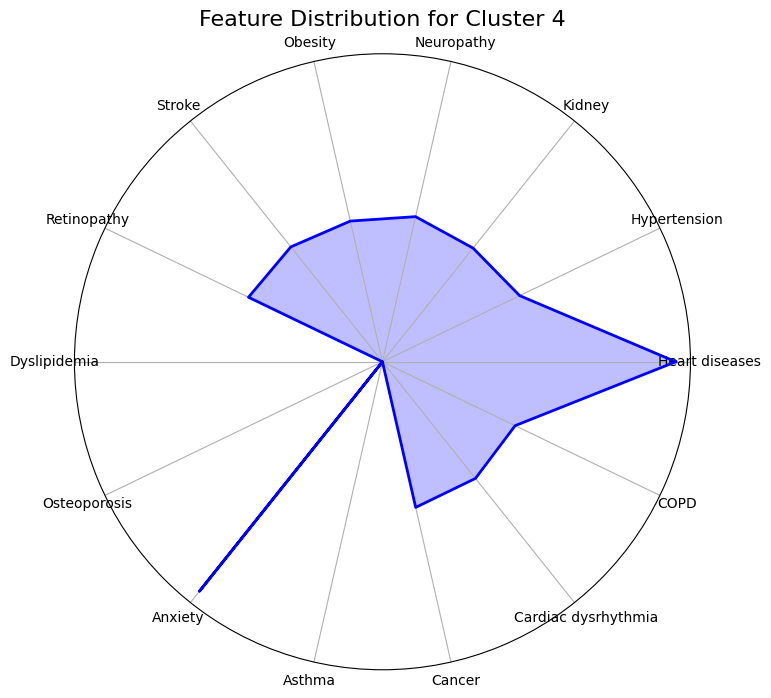

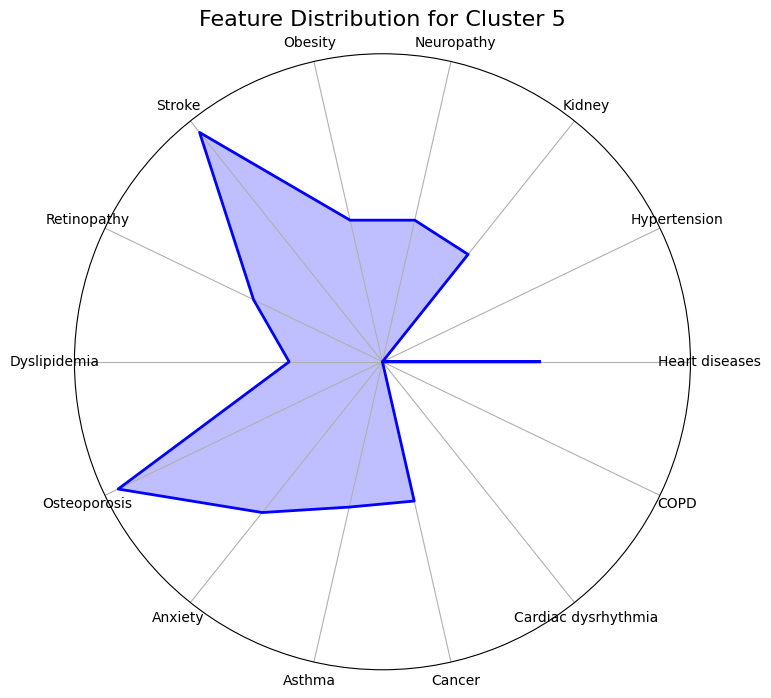

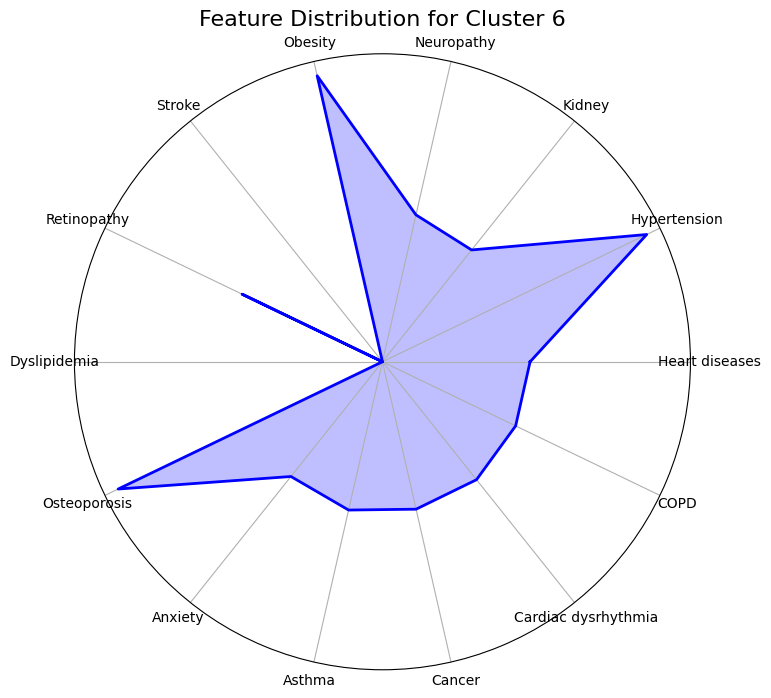

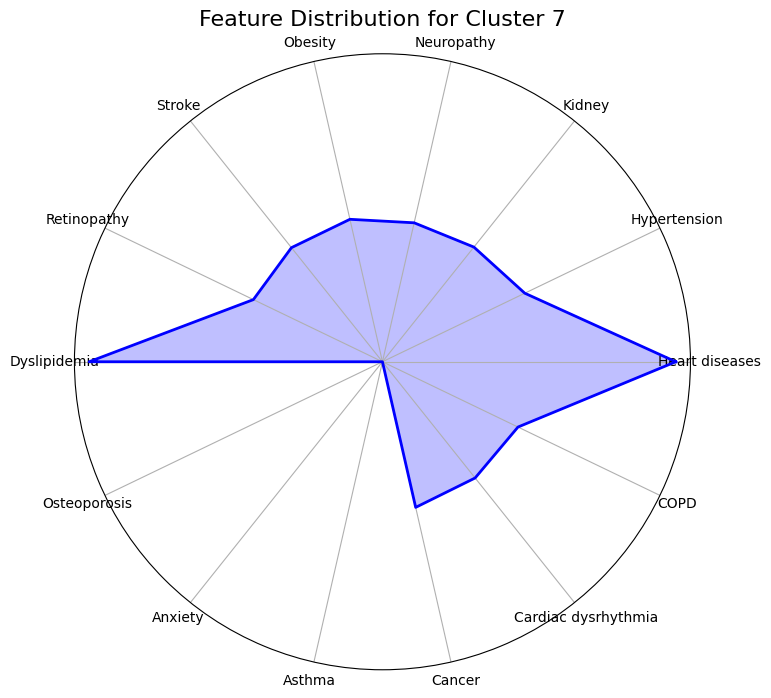

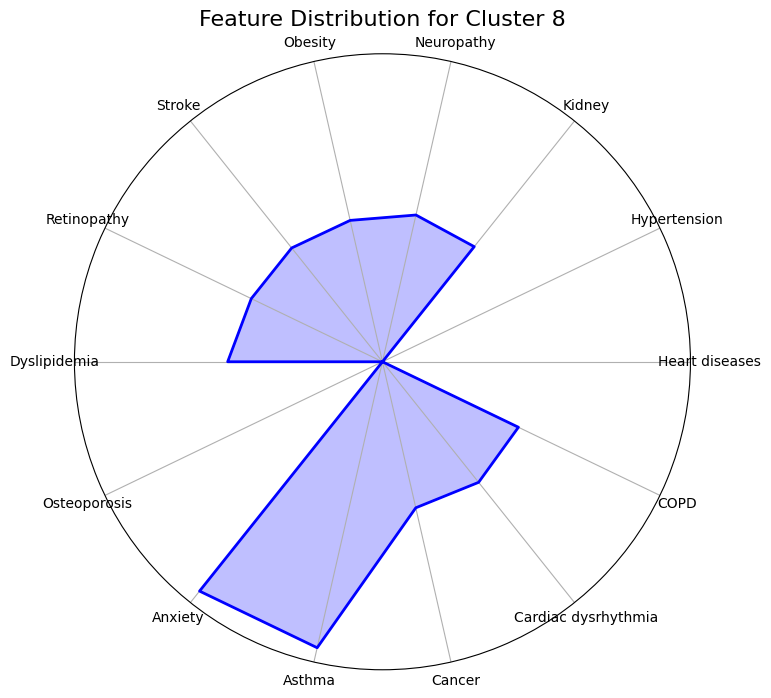

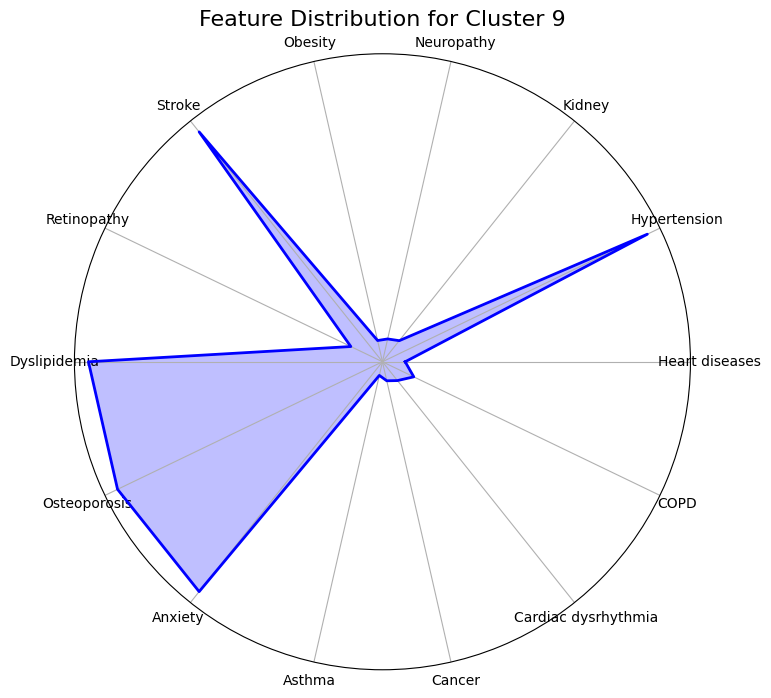

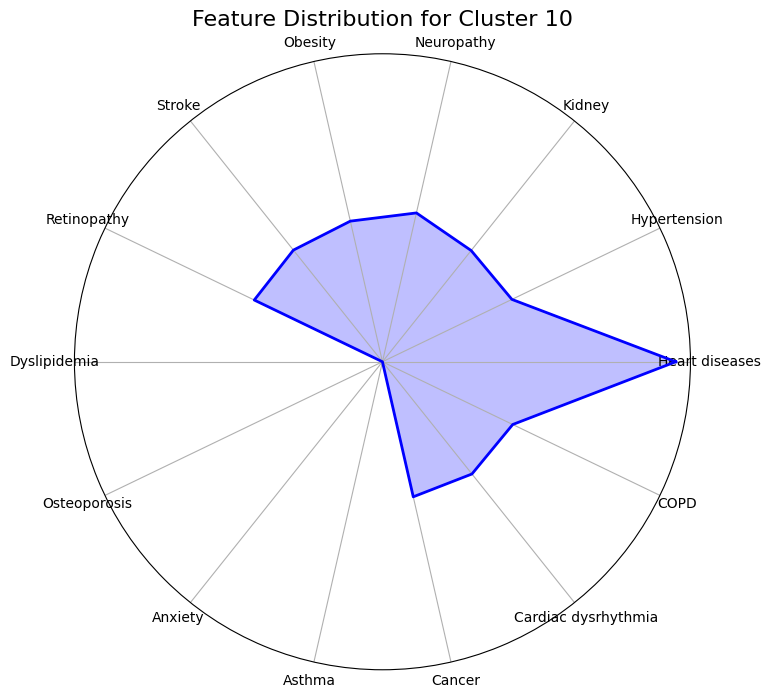

KeyError: 11

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Display dataset information
print(f"Dataset Shape: {df.shape}")  # Check if it has 14 columns
print("Dataset Columns:")
print(df.columns)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply Dirichlet Process Mixture Model (DPMM)
n_components = 50  # Set a high number for infinite mixture assumption
dpmm = BayesianGaussianMixture(
    n_components=n_components,
    covariance_type="full",
    weight_concentration_prior_type="dirichlet_process",  # Enable DPMM
    weight_concentration_prior=1e-2,  # Adjust concentration prior for sparsity
    random_state=42
)
labels = dpmm.fit_predict(data_scaled)
df['Cluster'] = labels

# Validation Metrics
silhouette_avg = silhouette_score(data_scaled, labels)
dbi = davies_bouldin_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {dbi:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Visualization 1: Scatter Plot with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.title("DPMM Clustering (PCA Projection)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.show()

# Visualization 2: Pairplot
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df[numeric_columns], hue="Cluster", palette="tab10", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02, fontsize=16)
plt.show()

# Visualization 3: Heatmap of Cluster Means
cluster_features = df.groupby("Cluster").mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_features, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Feature Contribution by Cluster", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()

# Visualization 4: Radar Chart for Each Cluster
for cluster_id in range(len(cluster_features)):
    cluster_means = cluster_features.loc[cluster_id]
    categories = cluster_means.index
    values = cluster_means.values
    values = np.append(values, values[0])  # Close the radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart

    # Plot radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.25)
    ax.plot(angles, values, color="blue", linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f"Feature Distribution for Cluster {cluster_id}", fontsize=16, pad=20)
    plt.show()

# Visualization 5: 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 0], c=labels, cmap='viridis', s=50)
ax.set_title("3D Scatter Plot of Clusters", fontsize=16)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

# Visualization 6: Bar Plot for Cluster Sizes
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Sizes", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.show()

# Evidence for Clusters
cluster_weights = dpmm.weights_
print(f"Cluster Weights (Posterior Probabilities): {cluster_weights}")
